# AirBnB Dataset Prediction

Testing linear regression (and 1 other algorithm) for predicting price of an AirBnB listing based on various features such as amenities, location and other factors.

The dataset used is from https://insideairbnb.com/get-the-data/. Credits to author.

3 main cities will be chosen for comparison.

They are Singapore, Tokyo Japan, and London England.

**Stick to Japan Dataset as of now**

**What the Dataset Columns Entail**

https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596

In [1]:
# AIRBNB PRICE PREDICTION ANALYSIS
import os

cwd = os.getcwd()
print(cwd)

c:\Users\avera\OneDrive\Documents\uni\uni shit\y2\Sem 2\INF2008 MachineLearning\mlbb


In [2]:
# move the Airbnb Dataset .gzip file to /content after downloading it at the website
import gzip
import shutil

# download the gzip file from the link above

compressed_name = 'london.csv.gz' # what ever name you choose for the gzip file
file_name = 'listings.csv'

with gzip.open(compressed_name, 'rb') as f_in:
    with open(file_name, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

The name of the file will be *listings.csv*

# 1. Data Cleaning and Preprocessing
Clean the data and analyse the features for the most relevant data to be fed to the model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show the three rows
# df = pd.read_csv('/content/listings.csv')
df = pd.read_csv('listings.csv')
df.head(3)

id                         listing_url       scrape_id last_scraped  \
0  56229  https://www.airbnb.com/rooms/56229  20241211032909   2024-12-12   
1  62970  https://www.airbnb.com/rooms/62970  20241211032909   2024-12-12   
2  63948  https://www.airbnb.com/rooms/63948  20241211032909   2024-12-12   

        source                                              name  \
0  city scrape      Cosy Double studio in Zone 2 Hammersmith (1)   
1  city scrape  3 Bedrm with Garden off Brick lane refurbd Oct24   
2  city scrape      Cosy Double studio in Zone 2 Hammersmith (4)   

                                         description  \
0                                                NaN   
1  Recently renovated  (Oct 2024) warehouse conve...   
2                                                NaN   

                               neighborhood_overview  \
0                                                NaN   
1  The neighbourhood is fantastic with Brick Lane...   
2                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/3860587/79e73...   216660  ...   
1  https://a0.muscache.com/pictures/prohost-api/H...   336059  ...   
2  https://a0.muscache.com/pictures/miso/Hosting-...   216660  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.79                   4.92                4.71   
1                        4.74                   4.63                4.51   
2                        4.78                   4.91                4.60   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                             11   
1     NaN                t                              1   
2     NaN                f                             11   

  calculated_host_listings_count_entire_homes  \
0                                           9   
1                                           1   
2                                           9   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.84  
1                                           0              1.05  
2                                           0              1.06  

[3 rows x 75 columns]

In [4]:
# View the columns to see what's available in the dataset
print(df.columns)
print(len(df.columns))

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
# view what data types exists in the dataset
# brief overview (uncomment to see)
# df.dtypes

# detailed overview
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95144 entries, 0 to 95143
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            95144 non-null  int64  
 1   listing_url                                   95144 non-null  object 
 2   scrape_id                                     95144 non-null  int64  
 3   last_scraped                                  95144 non-null  object 
 4   source                                        95144 non-null  object 
 5   name                                          95144 non-null  object 
 6   description                                   92196 non-null  object 
 7   neighborhood_overview                         43463 non-null  object 
 8   picture_url                                   95134 non-null  object 
 9   host_id                                       95144 non-null 

In [6]:
# How many rows are there before cleaning
df.shape[0]

95144

In [7]:
# Determine if there are null values within the dataset
# isnull.().sum(axis=0) does not show everything
# df.isnull().sum(axis=0)

# rather than check everything, just view what columns have null values
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Filter only columns with nulls
print(null_counts)

description                      2948
neighborhood_overview           51681
picture_url                        10
host_name                           7
host_since                          7
host_location                   22233
host_about                      46792
host_response_time              32435
host_response_rate              32435
host_acceptance_rate            27256
host_is_superhost                1748
host_thumbnail_url                  7
host_picture_url                    7
host_neighbourhood              48827
host_listings_count                 7
host_total_listings_count           7
host_verifications                  7
host_has_profile_pic                7
host_identity_verified              7
neighbourhood                   51680
neighbourhood_group_cleansed    95144
bathrooms                       32400
bathrooms_text                    156
bedrooms                        12350
beds                            32454
price                           32367
minimum_mini

We need to drop any unnecessary information that is not relevant to price calculation.

We can start first with any irrelevant data that has no impact on price calculation whatsoever.

We want to ensure these columns remain :

**Property & Listing Attributes**

* property_type (Different types have different pricing, e.g., "Apartment" vs. "Villa")
* room_type (Entire home/apt vs. private room affects price)
* accommodates (More guests usually means higher price)
* bathrooms_text (Number of bathrooms affects price)
* bedrooms (More bedrooms typically increase price)
* beds (More beds can increase listing value)
* amenities (Luxury amenities like pools, WiFi, and AC may increase price)


**Location**
* latitude / longitude (Can be used to extract geo-based price trends)

**Host Information** (If Significant)
* host_is_superhost (Superhosts may charge higher prices)
* host_listings_count / host_total_listings_count (Professional hosts vs. casual hosts may price differently)
* host_identity_verified (Could be a trust factor affecting pricing)
Availability & Minimum Nights
* minimum_nights (Longer stays could impact price)
* availability_30, availability_60, availability_90, availability_365 (More * * availability may suggest demand or pricing trends)

**Reviews & Ratings**
* number_of_reviews (More reviews may indicate demand)
* review_scores_rating (Higher ratings may allow higher prices)
* reviews_per_month (Shows frequency of bookings, indicating demand)

Edit as necessary*

In [8]:
# List of columns to drop
drop_columns = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
    'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
    'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'host_neighbourhood',
    'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic',
    'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review',
    'neighbourhood', 'neighborhood_overview', 'neighbourhood_group_cleansed', 'license', 'picture_url', 'host_id',
    'maximum_nights_avg_ntm', 'has_availability', 'calendar_last_scraped',
    'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review',
    'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'
]

# double check this
# columns to consider scrutizing
# superhost? description? (no desc, less lightly to be bought)

# Drop columns
df_cleaned = df.drop(columns=drop_columns)

In [9]:
# this is the new cleaned dataset
df_cleaned.head()

name  \
0      Cosy Double studio in Zone 2 Hammersmith (1)   
1  3 Bedrm with Garden off Brick lane refurbd Oct24   
2      Cosy Double studio in Zone 2 Hammersmith (4)   
3      Cosy Double studio in Zone 2 Hammersmith (3)   
4                Spacious single room in quiet flat   

                                         description  host_response_time  \
0                                                NaN        within a day   
1  Recently renovated  (Oct 2024) warehouse conve...  within a few hours   
2                                                NaN        within a day   
3                                                NaN        within a day   
4                                                NaN                 NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                99%                  95%                 f   
1               100%                 100%               NaN   
2                99%                  95%                 f   
3                99%                  95%                 f   
4                NaN                  NaN                 f   

  host_identity_verified  neighbourhood_cleansed  latitude  longitude  ...  \
0                      t  Hammersmith and Fulham  51.49392   -0.22754  ...   
1                      t           Tower Hamlets  51.52435   -0.06938  ...   
2                      t  Hammersmith and Fulham  51.49547   -0.22864  ...   
3                      t  Hammersmith and Fulham  51.49368   -0.22774  ...   
4                      t                Haringey  51.59031   -0.09408  ...   

  number_of_reviews review_scores_rating  review_scores_accuracy  \
0               145                 4.71                    4.71   
1               178                 4.52                    4.64   
2               170                 4.61                    4.62   
3               186                 4.65                    4.76   
4                13                 4.46                    4.69   

   review_scores_cleanliness review_scores_checkin  \
0                       4.67                  4.88   
1                       4.60                  4.80   
2                       4.69                  4.87   
3                       4.76                  4.87   
4                       4.77                  4.62   

   review_scores_communication  review_scores_location review_scores_value  \
0                         4.79                    4.92                4.71   
1                         4.74                    4.63                4.51   
2                         4.78                    4.91                4.60   
3                         4.77                    4.92                4.67   
4                         4.85                    4.62                4.23   

  instant_bookable  reviews_per_month  
0                f               0.84  
1                t               1.05  
2                f               1.06  
3                f               1.10  
4                f               0.09  

[5 rows x 40 columns]

In [10]:
# check for remaining missing values in the columns
df_cleaned.isnull().sum()

name                               0
description                     2948
host_response_time             32435
host_response_rate             32435
host_acceptance_rate           27256
host_is_superhost               1748
host_identity_verified             7
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                      32400
bathrooms_text                   156
bedrooms                       12350
beds                           32454
amenities                          0
price                          32367
minimum_nights                     0
maximum_nights                     0
minimum_minimum_nights             2
maximum_minimum_nights             2
minimum_maximum_nights             2
maximum_maximum_nights             2
minimum_nights_avg_ntm             2
availability_30                    0
a

In [11]:
# Drop the rows with empty fields
# some empty is fine, but need to consider the following : price, bedrooms, bathroom
df_cleaned = df_cleaned.dropna()

In [12]:
# check how much we are left with and ensure that there are no more field empty within the dataset
print(df_cleaned.isnull().sum())
print(df_cleaned.shape[0])

name                           0
description                    0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_

In [13]:
# view how many unique object exists in each column
include = ['object', 'float', 'int']
df_cleaned.describe(include=include)

name  \
count                                   42073   
unique                                  40977   
top     Letzi private en-suite, North Harrow.   
freq                                       12   
mean                                      NaN   
std                                       NaN   
min                                       NaN   
25%                                       NaN   
50%                                       NaN   
75%                                       NaN   
max                                       NaN   

                                              description host_response_time  \
count                                               42073              42073   
unique                                              37286                  4   
top     Enjoy a stylish experience at this centrally-l...     within an hour   
freq                                                  166              30007   
mean                                                  NaN                NaN   
std                                                   NaN                NaN   
min                                                   NaN                NaN   
25%                                                   NaN                NaN   
50%                                                   NaN                NaN   
75%                                                   NaN                NaN   
max                                                   NaN                NaN   

       host_response_rate host_acceptance_rate host_is_superhost  \
count               42073                42073             42073   
unique                 86                  101                 2   
top                  100%                 100%                 f   
freq                30929                14689             28971   
mean                  NaN                  NaN               NaN   
std                   NaN                  NaN               NaN   
min                   NaN                  NaN               NaN   
25%                   NaN                  NaN               NaN   
50%                   NaN                  NaN               NaN   
75%                   NaN                  NaN               NaN   
max                   NaN                  NaN               NaN   

       host_identity_verified neighbourhood_cleansed      latitude  \
count                   42073                  42073  42073.000000   
unique                      2                     33           NaN   
top                         t            Westminster           NaN   
freq                    39430                   5658           NaN   
mean                      NaN                    NaN     51.509870   
std                       NaN                    NaN      0.048159   
min                       NaN                    NaN     51.295937   
25%                       NaN                    NaN     51.486539   
50%                       NaN                    NaN     51.513628   
75%                       NaN                    NaN     51.537086   
max                       NaN                    NaN     51.681642   

           longitude  ... number_of_reviews review_scores_rating  \
count   42073.000000  ...      42073.000000         42073.000000   
unique           NaN  ...               NaN                  NaN   
top              NaN  ...               NaN                  NaN   
freq             NaN  ...               NaN                  NaN   
mean       -0.131133  ...         33.063960             4.684274   
std         0.101795  ...         61.597221             0.474926   
min        -0.496075  ...          1.000000             1.000000   
25%        -0.190952  ...          4.000000             4.580000   
50%        -0.132192  ...         12.000000             4.820000   
75%        -0.072240  ...         35.000000             5.000000   
max         0.295731  ...       1689.000000             5.000000   

        review_s

Since we are predicting the price, we have to convert the data type of the price column to a readable one

In [14]:
# parse the price column into readable float
df_cleaned['price'] = df_cleaned['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [15]:
df_cleaned.price.head()

6     120.0
8      40.0
12     83.0
13    300.0
14     70.0
Name: price, dtype: float64

**Feature Cleaning**

As a huge portion of the data is categorical in nature, we can use one hot encoding (https://www.kaggle.com/code/dansbecker/using-categorical-data-with-one-hot-encoding) to cateorize if an entry has *x* or *y* property or none at all.

The next sections will be dealing with processing with columns that are categorical so as to allow the model to better understand the relationship of each feature and how it correlates to the prediction of the price.



## 1.1 Property & Physical Attributes

The next few sections will be dedicated for processing the features of the physical atributes of the AirBnB listings.

### 1.1.1 Cleaning of Physical Attributes Features

Each features must be scrutinized and cleaned to be fitted into the model. Amenities, room types, bathroom and bedrooms and then price.

**Amenities**

We will first start of with amenities as an example.

We need to one-hot encoding for all the amenities listed within the given amenity column.

The format of the amenities is listed as an array i.e.

[ "Hangers", "Wi-Fi", ... "etc" ]

In [16]:
# need to start fitting the data for a correlation map
# get the unique values for all the amenities
# and encode them for fitting
import ast

df_cleaned['amenities'] = df_cleaned['amenities'].apply(ast.literal_eval)

# Get all unique amenities
unique_amenities = set()
df_cleaned['amenities'].apply(lambda x: unique_amenities.update(x))  # Flatten all amenities

# Convert to sorted list for readability
unique_amenities = sorted(unique_amenities)

# Display all unique amenities
print(unique_amenities)

[' AEG stainless steel oven', ' Bluetooth speaker available and Bluetooth speakers in garden  Bluetooth sound system', ' Bosch stainless steel double oven', ' Bosch stainless steel stove', ' Bose  sound system with Bluetooth and aux', ' Gaggenau Metro 90cm avant garde oven stainless steel single oven', ' Gaggenau Wine fridge and Bosch undercounter fridge refrigerator', ' Gilchrist Soames  body soap', ' Gilchrist Soames  conditioner', ' Gilchrist Soames  shampoo', ' Gilchrist and Soames body soap', ' Gilchrist and Soames conditioner', ' Gilchrist and Soames shampoo', ' Herbal conditioner', ' Radox 2 in 1 Shower gel and Shampoo  shampoo', ' Smeg refrigerator', ' Various  conditioner', ' bertazzoni stainless steel oven', ' ‘Ruark’ deluxe Bluetooth radio Bluetooth sound system', '"Various" body soap', '"Various" conditioner', '"Various" shampoo', '"portable stove" electric stove', '"portable stove" stove', '& ice box refrigerator', '(No freezer) refrigerator', '(only short stay, less than 

The sheer number of unique amenity values means that one-hot encoding will result in too much columns for amenities, resulting in overfitting.

To fix this, we need to categorise the amenities into broad categories to ensure reliable prediction.

In [17]:
# # Define categories with variations & Japanese translations
# wifi_amenities = {"wifi", "wi-fi", "無線lan", "ワイヤレスインターネット"}
# kitchen_amenities = {"kitchen", "microwave", "refrigerator", "stove", "oven", "調理場", "電子レンジ", "冷蔵庫", "コンロ", "オーブン"}
# parking_amenities = {"free parking", "paid parking", "駐車場", "無料駐車場", "有料駐車場"}
# pool_amenities = {"pool", "swimming pool", "hot tub", "浴槽", "プール", "温泉"}
# air_conditioning_amenities = {"air conditioning", "heating", "ceiling fan", "エアコン", "冷房", "暖房", "扇風機"}
# security_amenities = {"smoke alarm", "carbon monoxide alarm", "first aid kit", "fire extinguisher", "防火設備", "火災警報器", "一酸化炭素警報", "救急キット"}
# laundry_amenities = {"washer", "dryer", "laundromat", "iron", "洗濯機", "乾燥機", "ランドリー", "アイロン"}
# entertainment_amenities = {"tv", "sound system", "streaming services", "テレビ", "スピーカー", "ストリーミング"}

# # Function for case-insensitive & flexible matching (check if this works ** , can convert amenti to lower caps to standardize)
# def has_category(amenities, category):
#     return int(any(any(keyword in amenity for keyword in category) for amenity in amenities))

# # Each value will be checked according to the dictionaries, if any of string matches, place the category as 1
# # otherwise, it will be placed as 0
# # Apply function to dataset
# df_cleaned['has_wifi'] = df_cleaned['amenities'].apply(lambda x: has_category(x, wifi_amenities))
# df_cleaned['has_kitchen'] = df_cleaned['amenities'].apply(lambda x: has_category(x, kitchen_amenities))
# df_cleaned['has_parking'] = df_cleaned['amenities'].apply(lambda x: has_category(x, parking_amenities))
# df_cleaned['has_pool'] = df_cleaned['amenities'].apply(lambda x: has_category(x, pool_amenities))
# df_cleaned['has_air_conditioning'] = df_cleaned['amenities'].apply(lambda x: has_category(x, air_conditioning_amenities))
# df_cleaned['has_security'] = df_cleaned['amenities'].apply(lambda x: has_category(x, security_amenities))
# df_cleaned['has_laundry'] = df_cleaned['amenities'].apply(lambda x: has_category(x, laundry_amenities))
# df_cleaned['has_entertainment'] = df_cleaned['amenities'].apply(lambda x: has_category(x, entertainment_amenities))

# Define categorized amenities
wifi_amenities = {"Wifi", "Wi-Fi", "Ethernet connection", "無線lan", "ワイヤレスインターネット"}
kitchen_amenities = {"Kitchen", "Microwave", "Refrigerator", "Stove", "Oven", "BBQ grill", "Coffee maker", "Dining table"}
parking_amenities = {"Parking", "Garage", "EV charger", "free parking", "paid parking", "carport"}
pool_amenities = {"Pool", "Swimming pool", "Hot tub"}
air_conditioning_amenities = {"Air conditioning", "Heating", "Ceiling fan", "Indoor Fireplace"}
security_amenities = {"Smoke alarm", "Fire extinguisher", "Carbon monoxide alarm"}
laundry_amenities = {"Washer", "Dryer", "Iron", "Clothing storage", "Housekeeping"}
bathroom_amenities = {"Bathtub", "Bidet", "Hot water", "Body Soap", "Shampoo", "Conditioner"}
entertainment_amenities = {"TV", "HDTV", "Sound System", "Game console", "Streaming services"}
fitness_amenities = {"Exercise equipment", "Gym"}
child_friendly_amenities = {"Baby Monitor", "Baby bath", "High chair", "Crib", "Children’s books and toys"}
outdoor_amenities = {"Backyard", "BBQ grill"}
elevator_amenities = {"Elevator"}

# Combine all categories into one dictionary
all_amenities = {
    "has_wifi": wifi_amenities,
    "has_kitchen": kitchen_amenities,
    "has_parking": parking_amenities,
    "has_pool": pool_amenities,
    "has_air_conditioning": air_conditioning_amenities,
    "has_security": security_amenities,
    "has_laundry": laundry_amenities,
    "has_bathroom": bathroom_amenities,
    "has_entertainment": entertainment_amenities,
    "has_fitness": fitness_amenities,
    "has_child_friendly": child_friendly_amenities,
    "has_outdoor": outdoor_amenities,
    "has_elevator": elevator_amenities,
}

# Convert amenity strings into lists
df_cleaned['amenities'] = df_cleaned['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Apply category checks: True if any of the category amenities are in the listing
for column, category_set in all_amenities.items():
    df_cleaned[column] = df_cleaned['amenities'].apply(lambda x: any(item in category_set for item in x) if isinstance(x, list) else False)

# Also create columns for each **individual** amenity
for category_set in all_amenities.values():
    for amenity in category_set:
        col_name = f"has_{amenity.lower().replace(' ', '_')}"  # Normalize column name
        df_cleaned[col_name] = df_cleaned['amenities'].apply(lambda x: amenity in x if isinstance(x, list) else False)

print(df_cleaned.columns)

Index(['name', 'description', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude',
       ...
       'has_streaming_services', 'has_sound_system', 'has_exercise_equipment',
       'has_gym', 'has_children’s_books_and_toys', 'has_crib', 'has_baby_bath',
       'has_baby_monitor', 'has_high_chair', 'has_backyard'],
      dtype='object', length=101)


Some of the amenity classification has 0 listings, rendering it moot, so just drop them.

Should drop them if all listings have said amenity, as it would be meaningless to classify.

In [18]:
# check how many listings has
for amenity in df_cleaned.columns:
    if amenity.startswith('has_'):
        print(f"{amenity}: {df_cleaned[amenity].sum()} listings have this")
        if (df_cleaned[amenity].sum() == 0 or df_cleaned[amenity].sum() == df_cleaned.shape[0]):
            df_cleaned = df_cleaned.drop(columns=[amenity])
            print(f"Dropping {amenity}")


has_wifi: 38571 listings have this
has_kitchen: 38069 listings have this
has_parking: 0 listings have this
Dropping has_parking
has_pool: 121 listings have this
has_air_conditioning: 3111 listings have this
has_security: 40229 listings have this
has_laundry: 39775 listings have this
has_bathroom: 37863 listings have this
has_entertainment: 25204 listings have this
has_fitness: 1973 listings have this
has_child_friendly: 5906 listings have this
has_outdoor: 6107 listings have this
has_elevator: 7660 listings have this
has_wi-fi: 0 listings have this
Dropping has_wi-fi
has_無線lan: 0 listings have this
Dropping has_無線lan
has_ethernet_connection: 4469 listings have this
has_ワイヤレスインターネット: 0 listings have this
Dropping has_ワイヤレスインターネット
has_coffee_maker: 10513 listings have this
has_stove: 15530 listings have this
has_microwave: 27998 listings have this
has_refrigerator: 30453 listings have this
has_bbq_grill: 2750 listings have this
has_dining_table: 21371 listings have this
has_oven: 21635 l

In [19]:
df_cleaned.columns.tolist()

['name',
 'description',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'reviews_per_month',
 'has_wifi',
 'has_kitchen',
 'has_pool',
 'has_air_conditioning',
 'has_security',
 'has_laundry',
 'has_bathroom',
 'has_entertainment',
 'has_fitness',
 'has_ch

Feel free to add/delete/edit the amenity categories accordingly.

The key idea is to single out recurring patterns to categorise them.

If there is a valid use case for the categorisation i.e. splitting kitchen into *has_fridge* and *has_oven* , or *has_netflix* and/or other similar use cases.

In [20]:
# df.drop(columns=['amenities'], inplace = True) # Drop the amenities column if necessary
df_cleaned.head()

name  \
6   2 bed/2 bath luxury flat with city view!   
8         Bright single room in family home.   
12          Gorgeous double at Camden Market   
13         3 Bedroom House by Camden Stables   
14  Beautiful double room in Victorian house   

                                          description  host_response_time  \
6   The apartment is on the top floor of a portere...      within an hour   
8   Small, bright, single room in family home, ove...  within a few hours   
12  This fine property in the heart of Camden Town...      within an hour   
13  This fine property in the heart of Camden Town...      within an hour   
14  A very comfortable double room in our home wit...      within an hour   

   host_response_rate host_acceptance_rate host_is_superhost  \
6                100%                 100%                 f   
8                100%                   0%                 f   
12               100%                  79%                 t   
13               100%                  79%                 t   
14               100%                  50%                 f   

   host_identity_verified neighbourhood_cleansed  latitude  longitude  ...  \
6                       t                Lambeth  51.46156   -0.11183  ...   
8                       t              Southwark  51.46478   -0.08007  ...   
12                      t                 Camden  51.54417   -0.14651  ...   
13                      t                 Camden  51.54236   -0.14495  ...   
14                      t                 Barnet  51.61663   -0.14875  ...   

   has_hdtv has_game_console  has_tv  has_exercise_equipment has_gym  \
6     False            False   False                   False   False   
8     False            False   False                   False   False   
12    False            False   False                   False   False   
13    False            False   False                   False   False   
14    False            False   False                   False   False   

    has_children’s_books_and_toys  has_crib has_baby_bath  has_high_chair  \
6                           False     False         False           False   
8                           False     False         False           False   
12                          False      True         False           False   
13                           True      True         False           False   
14                          False     False         False           False   

    has_backyard  
6          False  
8          False  
12         False  
13         False  
14         False  

[5 rows x 86 columns]

Now we have the other unique values to process. This includes :

* property_type
* room_type
* bathrooms
* bathrooms_type
* bedrooms
* bedrooms_type
* accomodates

Other variables can be accounted for being used as factors, the aforementioned should be prioritised


**Room Type / Property Type**

Next will be the *room_type* and *property_type* of each listing.


In [21]:
# Each value listed is shown to be either shared or private.
# We can also categorise the property type based on ....

df_cleaned['property_type'].unique()

array(['Entire condo', 'Private room in home', 'Entire home',
       'Private room in rental unit', 'Entire rental unit',
       'Entire townhouse', 'Private room in townhouse',
       'Entire serviced apartment', 'Private room in loft',
       'Private room in condo', 'Entire guest suite', 'Houseboat',
       'Private room in bed and breakfast', 'Entire loft', 'Entire cabin',
       'Entire guesthouse', 'Private room in bungalow',
       'Private room in guest suite', 'Private room in guesthouse',
       'Shared room in condo', 'Entire cottage', 'Tiny home',
       'Private room in cottage', 'Private room in villa',
       'Private room in houseboat', 'Entire place', 'Room in aparthotel',
       'Room in hotel', 'Entire bungalow', 'Room in bed and breakfast',
       'Room in boutique hotel', 'Private room',
       'Private room in serviced apartment', 'Entire vacation home',
       'Boat', 'Entire villa', 'Shared room in home',
       'Room in serviced apartment', 'Earthen home',
    

In [22]:
df_cleaned['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

Between the 2, it better to use room_type as a better baseline comparison to avoid complicating these features.

We can drop *property_type* as a result, and just one-hot encode *room_type*.

In [23]:
# get rid of property type
df_cleaned = df_cleaned.drop(columns=['property_type'])

In [24]:
# and one-hot encode the room types
df_cleaned = pd.get_dummies(df_cleaned, columns=['room_type'], prefix=['room_type'])  # One-hot encode room_type
df_cleaned.columns

Index(['name', 'description', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'has_wifi', 'has_kitchen', 'has_pool', 'has_air_conditioning',
       'has_security', 'has_laundry', 'has_bathroom', 'has_entertainment',
    

In [25]:
df_cleaned.head(3)

name  \
6   2 bed/2 bath luxury flat with city view!   
8         Bright single room in family home.   
12          Gorgeous double at Camden Market   

                                          description  host_response_time  \
6   The apartment is on the top floor of a portere...      within an hour   
8   Small, bright, single room in family home, ove...  within a few hours   
12  This fine property in the heart of Camden Town...      within an hour   

   host_response_rate host_acceptance_rate host_is_superhost  \
6                100%                 100%                 f   
8                100%                   0%                 f   
12               100%                  79%                 t   

   host_identity_verified neighbourhood_cleansed  latitude  longitude  ...  \
6                       t                Lambeth  51.46156   -0.11183  ...   
8                       t              Southwark  51.46478   -0.08007  ...   
12                      t                 Camden  51.54417   -0.14651  ...   

    has_gym  has_children’s_books_and_toys has_crib  has_baby_bath  \
6     False                          False    False          False   
8     False                          False    False          False   
12    False                          False     True          False   

    has_high_chair has_backyard  room_type_Entire home/apt  \
6            False        False                       True   
8            False        False                      False   
12           False        False                      False   

    room_type_Hotel room  room_type_Private room  room_type_Shared room  
6                  False                   False                  False  
8                  False                    True                  False  
12                 False                    True                  False  

[3 rows x 88 columns]

**Bathrooms / Bathrooms Text**

Next will be the bathroom features *bathrooms* and *bathroom_text*. Similar to room and property features, we are going to focus on the *bathrooms* value only as it is already standardized.

The unique values will still be shown in case anyone wants to make use of the unique values in *bathroom_text*.

In [26]:
print("Unique numbers of bathrooms:\n")
print(df_cleaned.bathrooms.unique())
print(df_cleaned.bathrooms.value_counts())
print("\nUnique bathroom types in bathroom_text:\n")
print(df_cleaned.bathrooms_text.unique())
print(df_cleaned.bathrooms_text.value_counts())

Unique numbers of bathrooms:

[ 2.   1.   1.5  0.   2.5  3.   4.   3.5  0.5  4.5 10.   6.   5.   7.5
  5.5  6.5 13.  16.   8.5  9. ]
bathrooms
1.0     28042
2.0      6367
1.5      4209
2.5      1384
3.0       918
3.5       352
0.5       324
0.0       190
4.0       126
4.5        65
5.0        41
6.0        16
5.5        16
10.0       12
6.5         4
9.0         2
8.5         2
7.5         1
16.0        1
13.0        1
Name: count, dtype: int64

Unique bathroom types in bathroom_text:

['2 baths' '1 shared bath' '1.5 shared baths' '1 bath' '1.5 baths'
 '0 baths' '1 private bath' '2.5 baths' '3 shared baths' '4 baths'
 '2.5 shared baths' '3 baths' '2 shared baths' '3.5 baths'
 '0 shared baths' 'Half-bath' 'Shared half-bath' '4.5 baths'
 '3.5 shared baths' '4 shared baths' '10 baths' '6 baths' '5 baths'
 'Private half-bath' '7.5 baths' '10 shared baths' '5.5 baths' '6.5 baths'
 '13 baths' '16 baths' '8.5 baths' '5.5 shared baths' '9 baths'
 '4.5 shared baths' '6 shared baths' '5 shared b

In [27]:
# drop bathroom_text for now, only normalise bathrooms if need to
df_cleaned = df_cleaned.drop(columns=['bathrooms_text'])
df_cleaned.head(3)

name  \
6   2 bed/2 bath luxury flat with city view!   
8         Bright single room in family home.   
12          Gorgeous double at Camden Market   

                                          description  host_response_time  \
6   The apartment is on the top floor of a portere...      within an hour   
8   Small, bright, single room in family home, ove...  within a few hours   
12  This fine property in the heart of Camden Town...      within an hour   

   host_response_rate host_acceptance_rate host_is_superhost  \
6                100%                 100%                 f   
8                100%                   0%                 f   
12               100%                  79%                 t   

   host_identity_verified neighbourhood_cleansed  latitude  longitude  ...  \
6                       t                Lambeth  51.46156   -0.11183  ...   
8                       t              Southwark  51.46478   -0.08007  ...   
12                      t                 Camden  51.54417   -0.14651  ...   

    has_gym  has_children’s_books_and_toys  has_crib  has_baby_bath  \
6     False                          False     False          False   
8     False                          False     False          False   
12    False                          False      True          False   

   has_high_chair  has_backyard  room_type_Entire home/apt  \
6           False         False                       True   
8           False         False                      False   
12          False         False                      False   

    room_type_Hotel room  room_type_Private room  room_type_Shared room  
6                  False                   False                  False  
8                  False                    True                  False  
12                 False                    True                  False  

[3 rows x 87 columns]

**Bedrooms / Beds**

Any AirBnB should have beds and bedrooms, but apparently there might be some with 0 beds and bedrooms.

There's no need to clean these values at the moment, so we can leave them be.

In [28]:
print("Unique count of bedrooms:\n")
print(df_cleaned.bedrooms.unique())
print(df_cleaned.bedrooms.value_counts())
print("\nUnique count of beds:\n")
print(df_cleaned.beds.unique())
print(df_cleaned.beds.value_counts())

Unique count of bedrooms:

[ 2.  1.  3.  4.  0.  5.  7.  6.  9. 22.  8. 16. 10.]
bedrooms
1.0     25278
2.0      9846
3.0      3511
0.0      1707
4.0      1223
5.0       362
6.0       102
7.0        25
8.0        11
16.0        4
9.0         2
22.0        1
10.0        1
Name: count, dtype: int64

Unique count of beds:

[ 3.  1.  2.  4.  5.  8.  6.  0. 10.  7. 13.  9. 16. 18. 11. 17. 12. 15.
 38. 28. 14. 21. 19. 24.]
beds
1.0     20025
2.0     11105
3.0      5361
4.0      2565
0.0      1065
5.0       976
6.0       477
7.0       214
8.0       137
9.0        52
10.0       42
11.0       17
12.0        8
13.0        7
15.0        5
16.0        4
18.0        3
17.0        2
24.0        2
14.0        2
28.0        1
38.0        1
21.0        1
19.0        1
Name: count, dtype: int64


Aparently, there are listings with more than 15+ bedrooms. There's even a listing with 50+ bedrooms.

For beds, there are similar listings with beds over 15+ to 50?

Realistically this outliers should be deleted, but feel free to keep it for analysis.

In [29]:
# delete the rows with unrealistic beds and bedrooms
df_cleaned = df_cleaned[df_cleaned['bedrooms'] <= 10]
df_cleaned = df_cleaned[df_cleaned['beds'] <= 10]

**Accomodates**

How many guests can a listing accomodate in a booking. Presumably the greater the number the greater the price.

Similarly there's no need to clean it, since its a whole number with no set limit.

In [30]:
print(df_cleaned.accommodates.unique())
print(df_cleaned.accommodates.value_counts())

[ 6  1  4  9  2  5  7  3  8 12 10 13 14 16 11 15]
accommodates
2     15559
4      9203
1      4260
6      3951
3      3457
5      2651
8      1147
7       820
10      351
9       274
12      130
11       88
14       40
16       39
13       27
15       22
Name: count, dtype: int64


### 1.1.2 Price analysis

Before analysing the other features, we can start with the actual prices available first.

We can plot out the range of prices available, the mean of price of all legitimate listings, the highest and lowest among other comparisons.

In [31]:
print("Number of listing") # Double checking
print(df_cleaned.price.count())
print("Mean price of all listings:")
print(df_cleaned.price.mean())
print("Highest price of all listings:")
print(df_cleaned.price.max())
print("Lowest price of all listings:")
print(df_cleaned.price.min())
print("Median price of all listings:")
print(df_cleaned.price.median())

Number of listing
42019
Mean price of all listings:
189.73074085532735
Highest price of all listings:
80000.0
Lowest price of all listings:
1.0
Median price of all listings:
130.0


There might be a necessity to remove outliers. Feel free to discuss and determine if required.

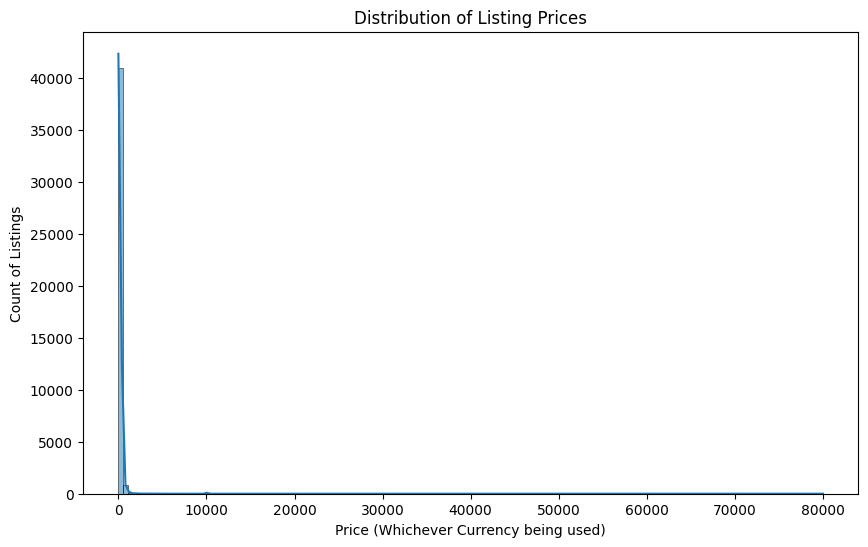

In [32]:
# plot the price range in histogram for seeing price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=140, kde=True)
plt.xlabel("Price (Whichever Currency being used)")
plt.ylabel("Count of Listings")
plt.title("Distribution of Listing Prices")
plt.show()

Due to massive outliers in the price, its hard to see the actual distribution in price, we have to use other methods to see the proper distribution.

It might be good practice to remove the high percentile listings as their values might be skewing the data heavily.

In [33]:
# Removing high percentile outliers
# Define a reasonable threshold (e.g., 99th percentile)
price_threshold = np.percentile(df_cleaned["price"], 90)

# Filter data
# Comment/Uncomment out the df_filtered line if you want to separate 2 datasets
# 1 with all the listings, 1 with the top 0.5 percentile listings based onn price removed.
# df_filtered = df_cleaned[df_cleaned["price"] <= price_threshold] # Comment/Uncomment accordingly
df_cleaned = df_cleaned[df_cleaned["price"] <= price_threshold]
print(df_cleaned.shape[0])
# print(df_filtered.shape[0]) # Comment/Uncomment accordingly

37872


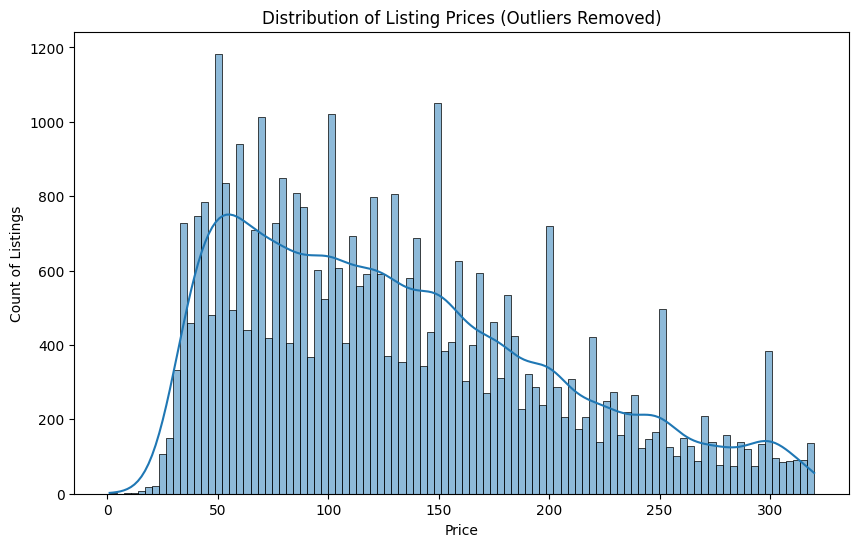

In [34]:
# Replot
plt.figure(figsize=(10, 6))
# sns.histplot(df_filtered["price"], bins=100, kde=True) # Comment/Uncomment accordingy
sns.histplot(df_cleaned["price"], bins=100, kde=True) # Uncomment this to run the filtered base dataset, if the the outlier was removed
plt.xlabel("Price")
plt.ylabel("Count of Listings")
plt.title("Distribution of Listing Prices (Outliers Removed)")
plt.show()

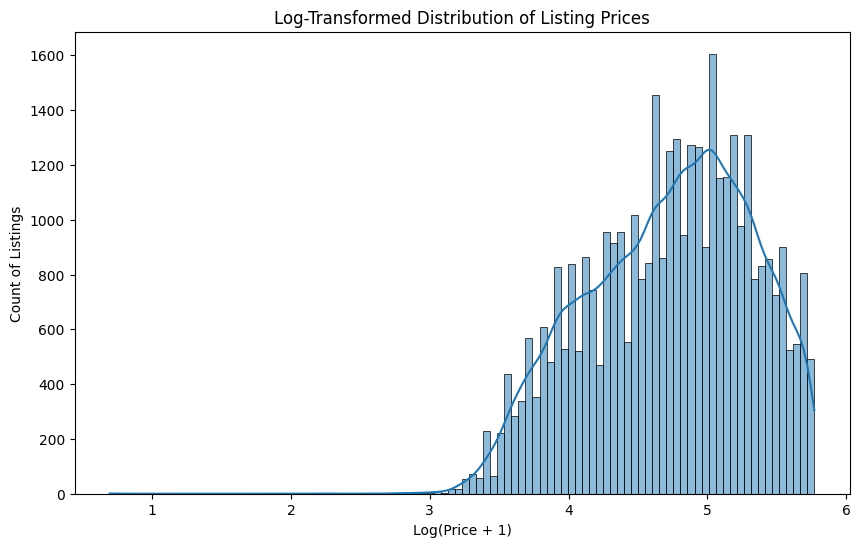

In [35]:
# Log transformation post filtered
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_cleaned["price"]), bins=100, kde=True)  # log1p avoids log(0)
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count of Listings")
plt.title("Log-Transformed Distribution of Listing Prices")
plt.show()

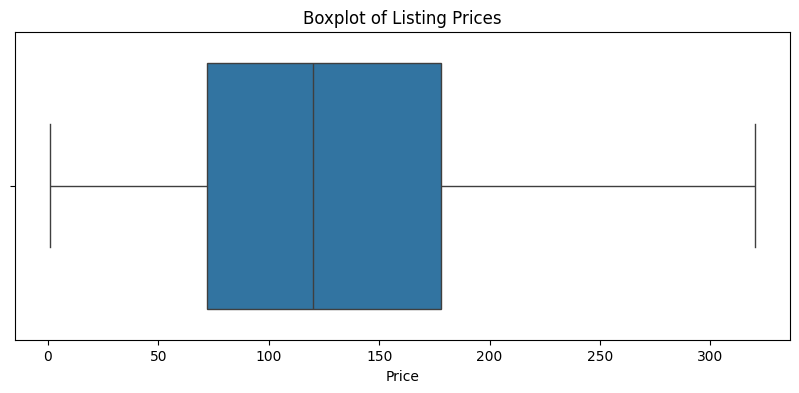

In [36]:
# Boxplot to see outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned["price"])
plt.xlabel("Price")
plt.title("Boxplot of Listing Prices")
plt.show()

As we can the majority of the distribution lies in the area between 0.0 ~ 0.2 (1000 ~ 30000). Keep in mind the price follows the le7 nototation in the boxplot if the outlier was not removed.

If the outlier was not removed, then the outlier at the far right should be the listing with the $15789885.0 price. There are also 2 other outilers from 0.4 ~ 0.8 (60000~ onwards), so this should be accounted for as well.

For fair analysis, it might be good to remove the outliers, as it may skew the numbers greatly.

**Outliers**

We are going to separate more outliers from the curve and perform analysis to see if the data is actually accurate.

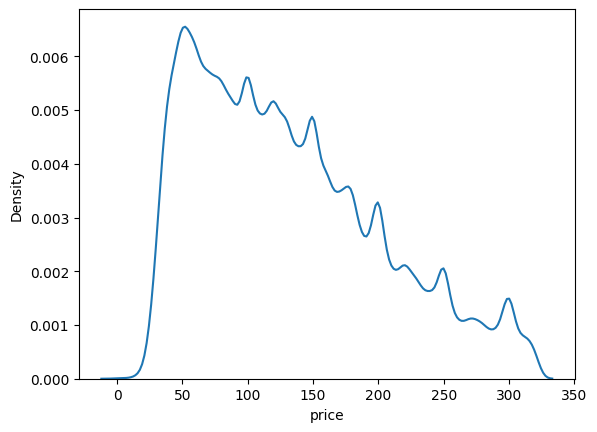

In [37]:
# check here WIP
# Compute KDE (smoothed curve from histogram)
kde = sns.kdeplot(df_cleaned["price"], bw_adjust=0.5)

# Find the peak (mode) of the distribution
peak_price = df_cleaned["price"].mode()[0]

# Define threshold dynamically (e.g., 3x peak price)
threshold = 3 * peak_price

# Split data
df_cleaned_no_outliers = df_cleaned[df_cleaned["price"] <= threshold]
df_cleaned_outliers = df_cleaned[df_cleaned["price"] > threshold]

In [38]:
df_cleaned.shape[0]

37872

### 1.1.3 Analysis of Physical Attributes

This section we will be delving deeper into analysing each feature and its relationship to a listing's price.

First, we can get a heatmap to see just how much of these features correlate to the price of each listing.

**Amenities analysis**

Keep in mind that correlation heatmaps are not entirely accurate to show the true relationship of feature to a listing's price. Amenities for example only have true/false values and not much variance; other forms of analysis may be better suited to understand which feature may have stronger weightage on price.

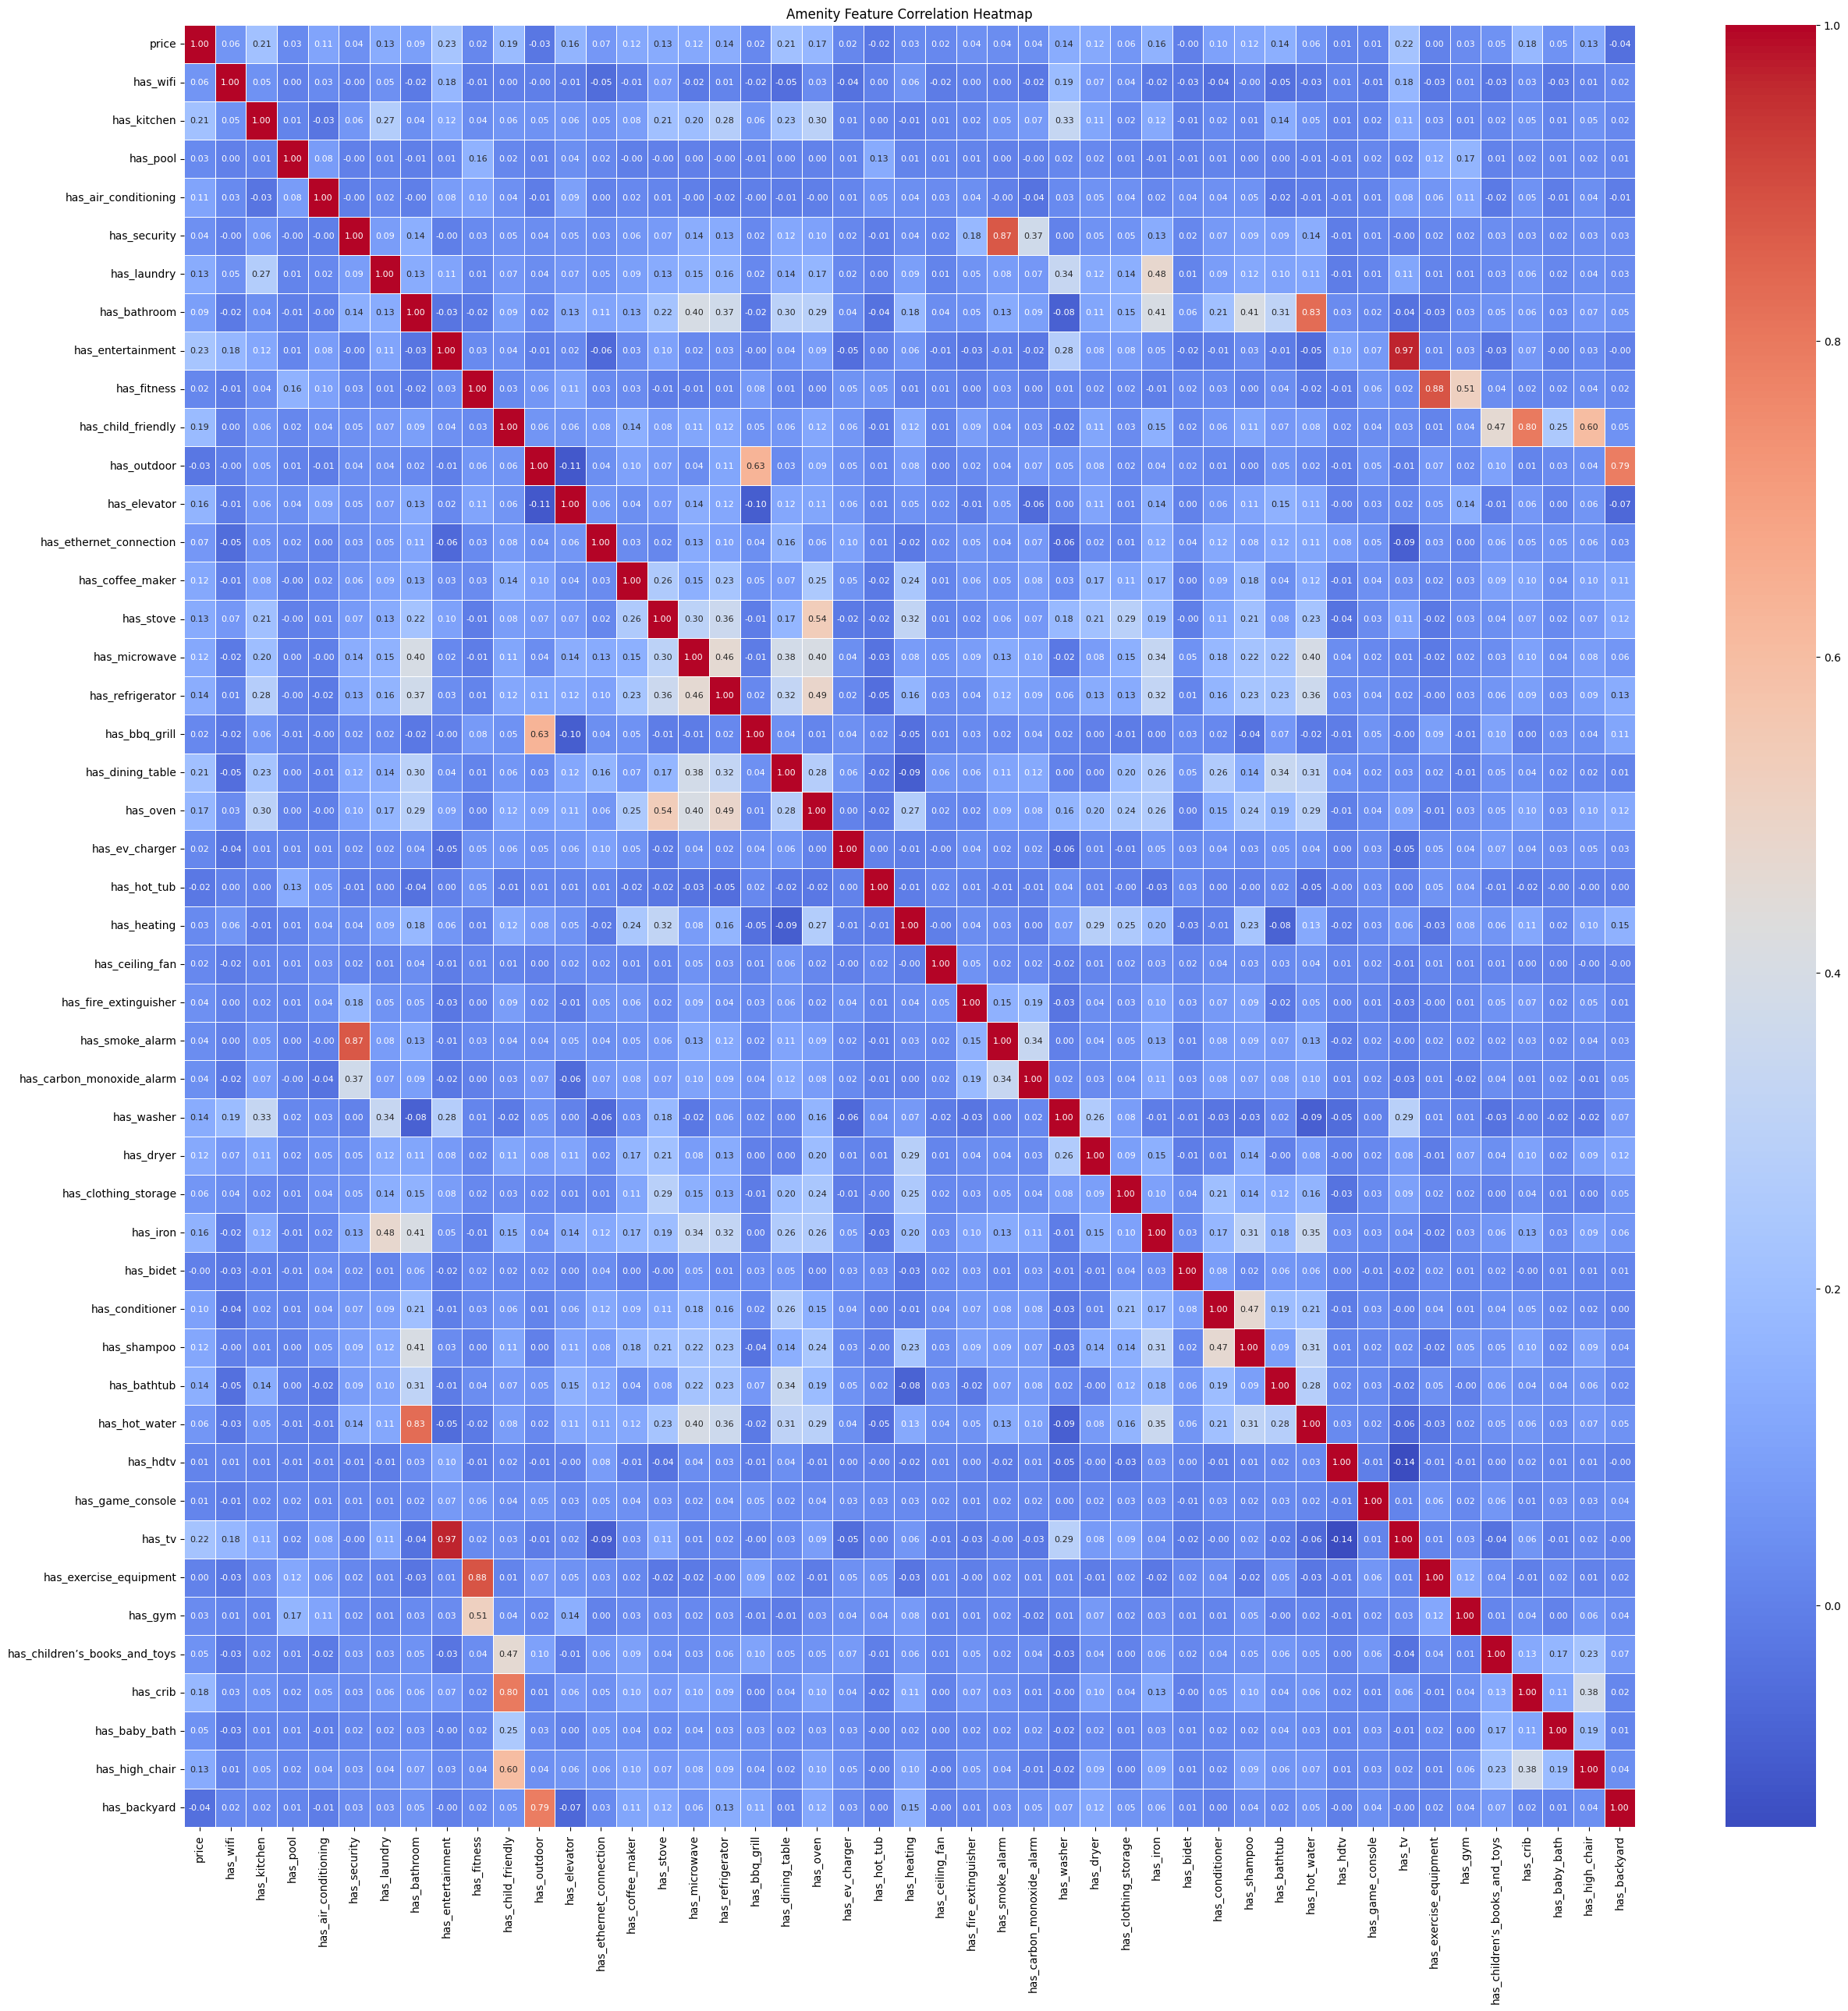

In [39]:
# amenities only heatmap
amenities_attribute_corr_columns = ['price']
amenities_attribute_corr_columns.extend([col for col in df_cleaned.columns if col.startswith('has_')])
corr_matrix = df_cleaned[amenities_attribute_corr_columns]
# get rid of any columns that have constant values, offers nothing to correlate
corr_matrix = corr_matrix.loc[:, corr_matrix.nunique() > 1]
corr_matrix = corr_matrix.corr()

plt.figure(figsize=(30,30))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

plt.title("Amenity Feature Correlation Heatmap")
plt.xticks(rotation=90)
plt.show()

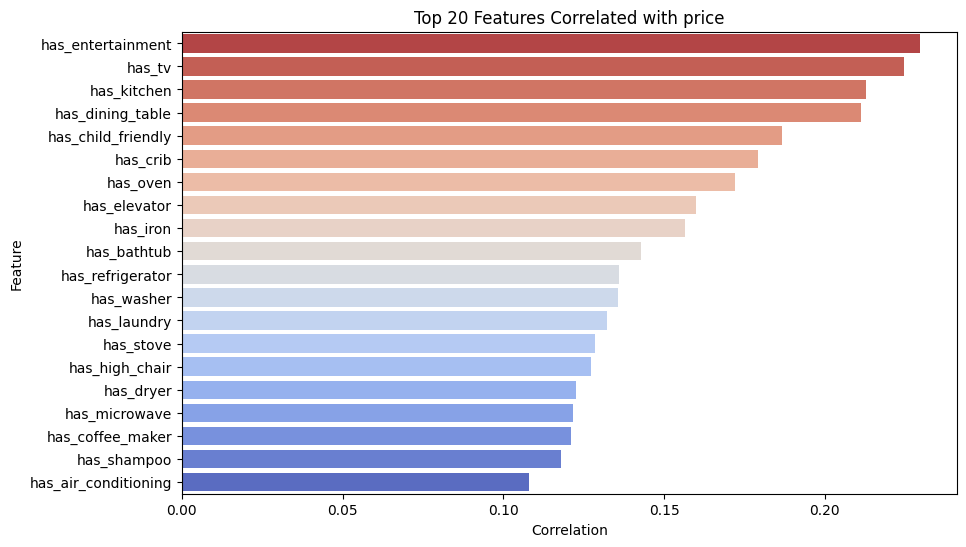

In [40]:
# Top 20 Most Correlated Features to 'Price'
target_feature = 'price'
top_10_corr = corr_matrix[target_feature].abs().sort_values(ascending=False)[1:21]  # Exclude self-correlation

# Plot Top 20 Correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_corr.values, y=top_10_corr.index, palette="coolwarm_r", hue=top_10_corr.index, legend="auto")  # "_r" reverses colors
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title(f"Top 20 Features Correlated with {target_feature}")
plt.show()

Apparently having a dinner table in your AirBnB might have the greatest positive impact on your price listing.

We can do other forms of analysis with amenities.

In [41]:
# Current mean of all listings without any changes
print("Current price mean:")
print(df_cleaned.price.mean())

Current price mean:
131.30727186311788


We can check the mean price of all listings with any one amenitiy, and check against the mean price of all listings.

By doing so, we can see if there are any sizable increase in mean price listings based if a listing has a particular amenity.

In [42]:
amenities_attribute_corr_columns = ['price']
amenities_attribute_corr_columns.extend([col for col in df_cleaned.columns if col.startswith('has_')])
check_mean = df_cleaned[amenities_attribute_corr_columns]

# Create a results list
results = []

# Iterate through each amenity column (excluding 'price')
for amenity in amenities_attribute_corr_columns[1:]:
    mean_with = check_mean.loc[check_mean[amenity] == 1, "price"].mean()
    mean_without = check_mean.loc[check_mean[amenity] == 0, "price"].mean()

    # Append to results
    results.append([amenity, mean_with, mean_without])

# Convert to DataFrame
df_amenity_means = pd.DataFrame(results, columns=["Amenity", "Mean Price (With)", "Mean Price (Without)"])

# Display the DataFrame
df_amenity_means

Amenity  Mean Price (With)  Mean Price (Without)
0                        has_wifi         132.534164            118.018432
1                     has_kitchen         136.496065             86.683650
2                        has_pool         168.463918            131.211860
3            has_air_conditioning         161.611352            129.340625
4                    has_security         131.970212            116.744694
5                     has_laundry         133.671717             93.552419
6                    has_bathroom         133.430669            113.061550
7               has_entertainment         145.024804            111.673686
8                     has_fitness         137.854953            131.000304
9              has_child_friendly         166.948487            126.307651
10                    has_outdoor         126.860063            132.043797
11                   has_elevator         156.511128            126.114324
12        has_ethernet_connection         145.596371            129.712231
13               has_coffee_maker         146.913948            126.520047
14                      has_stove         143.596035            124.446922
15                  has_microwave         137.628629            119.363394
16               has_refrigerator         137.405181            115.809893
17                  has_bbq_grill         137.193398            130.915571
18               has_dining_table         146.608353            116.422253
19                       has_oven         143.578162            118.996139
20                 has_ev_charger         139.141347            131.147488
21                    has_hot_tub         115.448193            131.482980
22                    has_heating         132.909947            129.284110
23                has_ceiling_fan         145.026423            131.126699
24          has_fire_extinguisher         135.087402            128.651171
25                has_smoke_alarm         131.930564            120.905184
26      has_carbon_monoxide_alarm         132.857614            126.573951
27                     has_washer         138.508371            118.218213
28                      has_dryer         149.191287            127.004259
29           has_clothing_storage         138.962904            128.796199
30                       has_iron         137.191770            110.017315
31                      has_bidet         130.556711            131.328842
32                has_conditioner         142.820670            127.003374
33                    has_shampoo         138.405970            121.274645
34                    has_bathtub         142.505031            121.997195
35                  has_hot_water         133.189859            120.203097
36                       has_hdtv         137.676951            131.213231
37               has_game_console         142.692857            131.222468
38                         has_tv         145.217524            112.764554
39         has_exercise_equipment         133.003740            131.245190
40                        has_gym         152.326882            131.045981
41  has_children’s_books_and_toys         152.111111            130.675618
42                       has_crib         174.275105            127.480633
43                  has_baby_bath         167.256881            130.994167
44                 has_high_chair         171.823982            129.264243
45                   has_backyard         121.432929            132.325741

We can list out the prices and compare them to see if they are above the mean or below it.

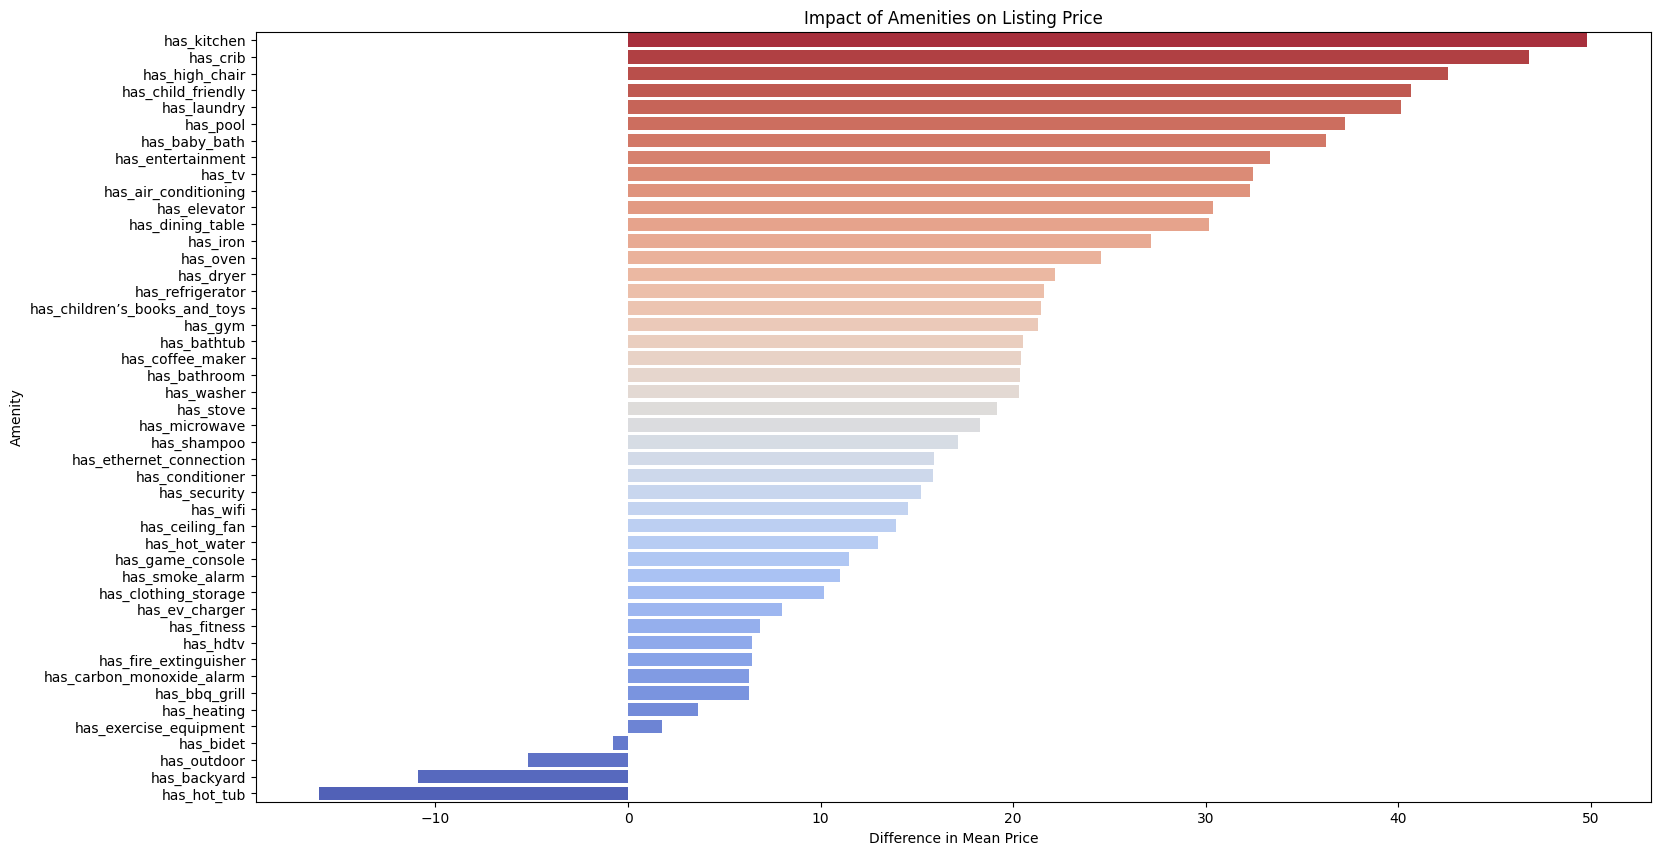

In [43]:
# get rid of the columns with empty values
df_amenity_means = df_amenity_means.dropna()

# Sort by price difference
df_amenity_means["Price Difference"] = df_amenity_means["Mean Price (With)"] - df_amenity_means["Mean Price (Without)"]
df_amenity_means = df_amenity_means.sort_values("Price Difference", ascending=False)

# Plot
plt.figure(figsize=(18, 10))
sns.barplot(data=df_amenity_means, x="Price Difference", y="Amenity", palette="coolwarm_r", legend="auto", hue="Amenity")
plt.title("Impact of Amenities on Listing Price")
plt.xlabel("Difference in Mean Price")
plt.ylabel("Amenity")
plt.show()

Below is a chi-squared analysis of amenity and prices

In [44]:
# Chi Squared Analysis
import scipy.stats as stats
# amenities_attribute_corr_columns = ['price']
# amenities_attribute_corr_columns.extend([col for col in df_cleaned.columns if col.startswith('has_')])
# chi_sq = df_cleaned[amenities_attribute_corr_columns].copy()

# # chi_sq['price_category'] = pd.qcut(chi_sq['price'], q=3, labels=["Low", "Medium", "High"])
# chi_sq['price_category'] = pd.qcut(chi_sq['price'], q=3, labels=["Low", "Medium", "High"])
# contigency_table = pd.crosstab(chi_sq['price_category'], chi_sq['has_wifi'])
# print(contigency_table)

# chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
# print("Chi-Squared Value:", chi2)
# print("P-Value:", p)

# # Interpretation
# if p < 0.05:
#     print("Significant relationship between has_pool and price category!")
# else:
#     print("No significant relationship found.")
# Select relevant columns
amenities_attribute_corr_columns = ['price']
amenities_attribute_corr_columns.extend([col for col in df_cleaned.columns if col.startswith('has_')])
chi_sq = df_cleaned[amenities_attribute_corr_columns].copy()

# Create price categories
chi_sq['price_category'] = pd.qcut(chi_sq['price'], q=3, labels=["Low", "Medium", "High"])
print(chi_sq['price_category'].value_counts())

# Store results
significant_amenities = []

# Iterate over all amenities
for amenity in [col for col in chi_sq.columns if col.startswith('has_')]:
    contigency_table = pd.crosstab(chi_sq['price_category'], chi_sq[amenity])

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

    # Check significance (p < 0.05 means significant relationship)
    if p < 0.05:
        significant_amenities.append((amenity, p))

# Sort by p-value (ascending)
significant_amenities.sort(key=lambda x: x[1])

print(f"{len(significant_amenities)} amenities have postive impact on price.\n")

# Print results
print("Amenities with a significant relationship to price category:")
for amenity, p_value in significant_amenities:
    print(f"{amenity}: p-value = {p_value:.5f}")


price_category
Medium    12728
Low       12670
High      12474
Name: count, dtype: int64
43 amenities have postive impact on price.

Amenities with a significant relationship to price category:
has_kitchen: p-value = 0.00000
has_entertainment: p-value = 0.00000
has_dining_table: p-value = 0.00000
has_tv: p-value = 0.00000
has_oven: p-value = 0.00000
has_child_friendly: p-value = 0.00000
has_crib: p-value = 0.00000
has_iron: p-value = 0.00000
has_elevator: p-value = 0.00000
has_bathtub: p-value = 0.00000
has_refrigerator: p-value = 0.00000
has_washer: p-value = 0.00000
has_laundry: p-value = 0.00000
has_stove: p-value = 0.00000
has_microwave: p-value = 0.00000
has_high_chair: p-value = 0.00000
has_shampoo: p-value = 0.00000
has_coffee_maker: p-value = 0.00000
has_dryer: p-value = 0.00000
has_air_conditioning: p-value = 0.00000
has_conditioner: p-value = 0.00000
has_bathroom: p-value = 0.00000
has_ethernet_connection: p-value = 0.00000
has_hot_water: p-value = 0.00000
has_outdoor: p-valu

**Room types**

Analysing what kind of effect the room type has on price.

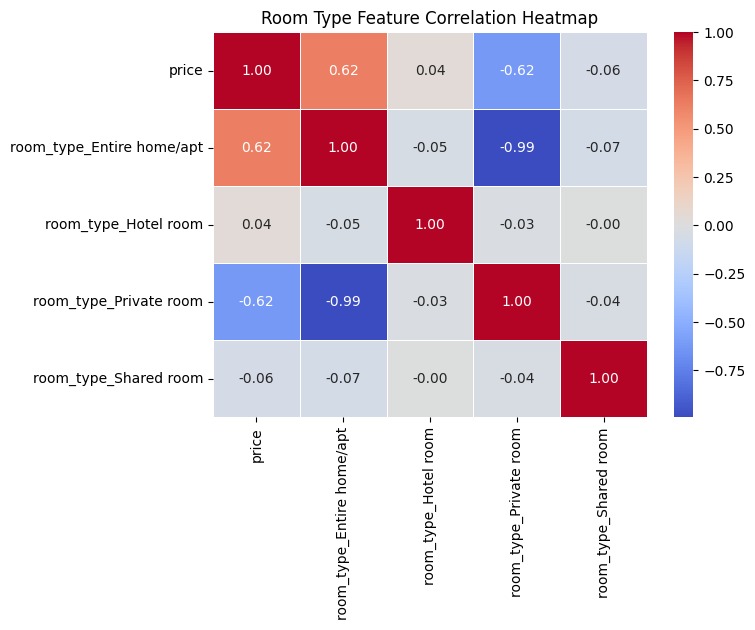

In [45]:
# room_types only heatmap
room_types_attribute_corr_columns = ['price', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']
corr_matrix = df_cleaned[room_types_attribute_corr_columns].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Room Type Feature Correlation Heatmap")
plt.show()

**Other physical attributes**

Here we can see the heatmap and other visual representation for each feature.

The graphs itself is pretty self-explanatory and simply shows the relationship between the features and price.

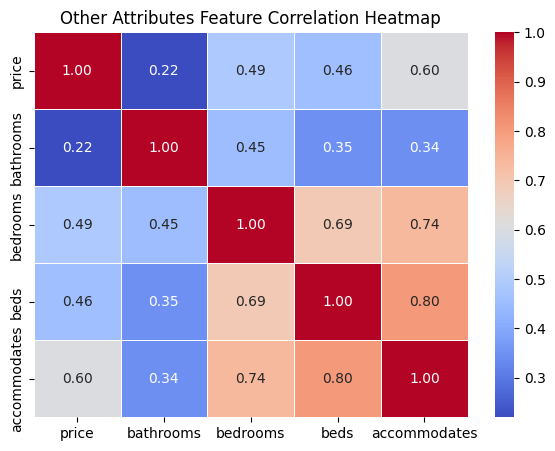

In [46]:
# the rest of the physical attribute features
other_atritbutes_corr_columns = ['price', 'bathrooms', 'bedrooms', 'beds', 'accommodates']
corr_matrix = df_cleaned[other_atritbutes_corr_columns].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Other Attributes Feature Correlation Heatmap")
plt.show()

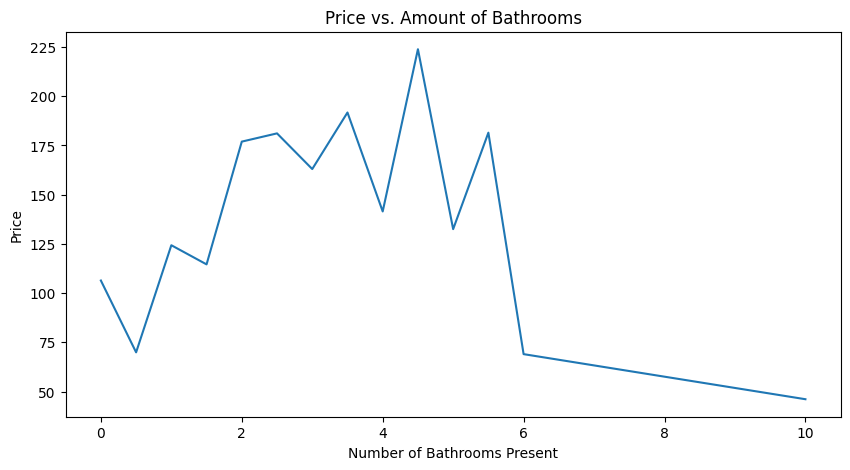

In [47]:
# Price against bathrooms graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="bathrooms", y="price", errorbar=None)
plt.xlabel("Number of Bathrooms Present")
plt.ylabel("Price")
plt.title("Price vs. Amount of Bathrooms")
plt.show()

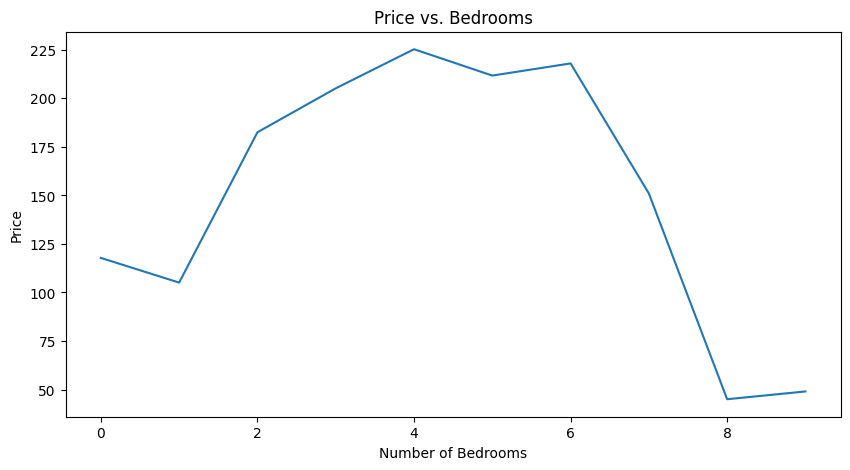

In [48]:
# Price against bedrooms graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="bedrooms", y="price", errorbar=None)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price vs. Bedrooms")
plt.show()

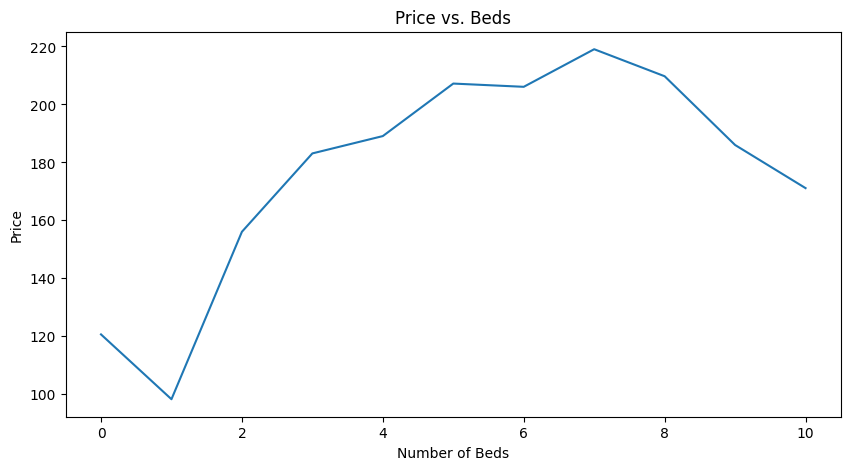

In [49]:
# Price against beds graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="beds", y="price", errorbar=None)
plt.xlabel("Number of Beds")
plt.ylabel("Price")
plt.title("Price vs. Beds")
plt.show()

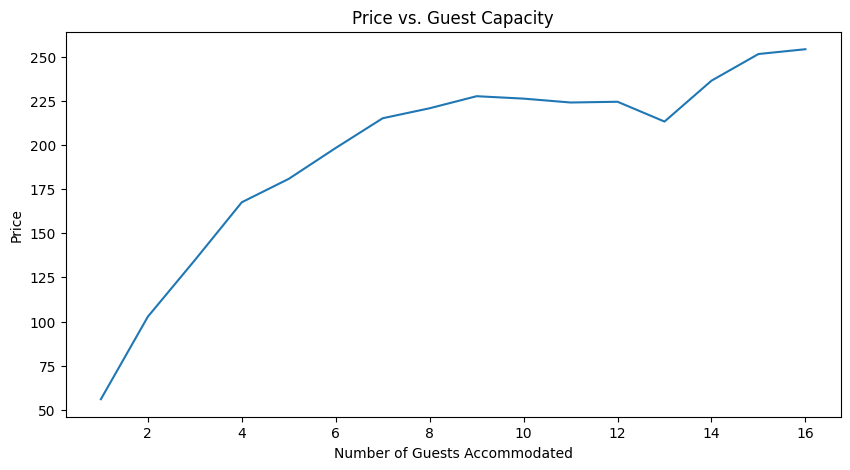

In [50]:
# Price against accomodation graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="accommodates", y="price", errorbar=None)
plt.xlabel("Number of Guests Accommodated")
plt.ylabel("Price")
plt.title("Price vs. Guest Capacity")
plt.show()

Currently due to outliers in the dataset, some of the graphs look pretty inaccurate.

Will have to discuss if want to remove them in the future.

## 1.2 Location Attributes

Unknown if want to proceed with this.

In [51]:
location_attributes=['price','longitude','latitude','neighbourhood_cleansed']
df_cleaned[location_attributes].head()

price  longitude  latitude neighbourhood_cleansed
6   120.0   -0.11183  51.46156                Lambeth
8    40.0   -0.08007  51.46478              Southwark
12   83.0   -0.14651  51.54417                 Camden
13  300.0   -0.14495  51.54236                 Camden
14   70.0   -0.14875  51.61663                 Barnet

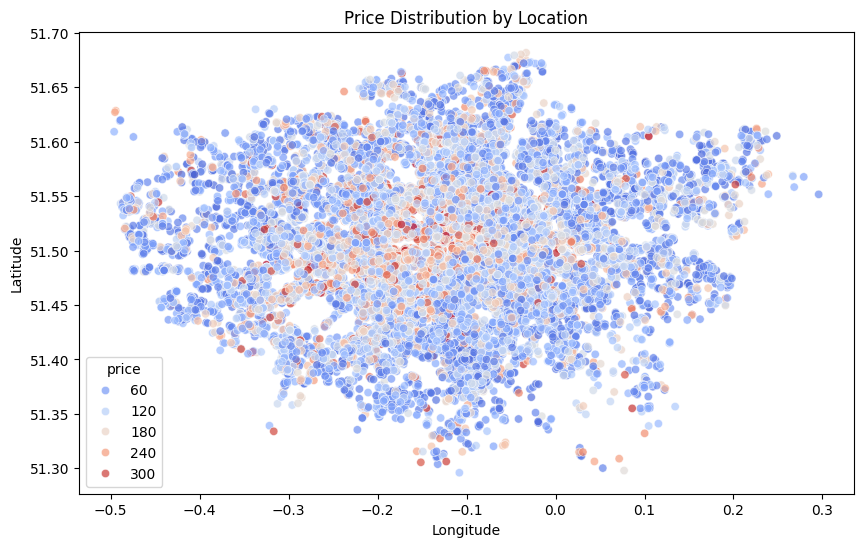

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="longitude", y="latitude", hue="price", palette="coolwarm", alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Price Distribution by Location")
plt.show()

**Nearest Distance to Any Station**

In [53]:
# import json
# from geopy.distance import geodesic

# # Load the JSON file containing station data
# with open("stations.json", "r", encoding="utf-8") as f:
#     station_data = json.load(f)

# # Extract station coordinates
# station_coords = []
# for station_group in station_data:
#     for station in station_group.get("stations", []):
#         lat = station.get("lat")
#         lon = station.get("lon")
#         if lat and lon:
#             station_coords.append((lat, lon))

# # Function to calculate minimum distance to nearest station
# def get_nearest_station_distance(listing_lat, listing_lon):
#     return min(geodesic((listing_lat, listing_lon), station).kilometers for station in station_coords)

# # Apply function to all listings
# df_cleaned["distance_to_nearest_station"] = df_cleaned.apply(
#     lambda row: get_nearest_station_distance(row["latitude"], row["longitude"]), axis=1
# )

# print("Updated listings with nearest station distances saved.")

In [54]:
# location_attributes.append('distance_to_nearest_station')
# df_cleaned[location_attributes].head(3)

## 1.3 Host Atttributes

Feature processing with features corresponding to host information

The list of Host attribute features consists of:

 * 'host_response_time'
 * 'host_response_rate'
 * 'host_acceptance_rate'
 * 'host_is_superhost'
 * 'host_identity_verified'

In [55]:
host_attributes = ['price','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_identity_verified']
df_cleaned[host_attributes].head()

price  host_response_time host_response_rate host_acceptance_rate  \
6   120.0      within an hour               100%                 100%   
8    40.0  within a few hours               100%                   0%   
12   83.0      within an hour               100%                  79%   
13  300.0      within an hour               100%                  79%   
14   70.0      within an hour               100%                  50%   

   host_is_superhost host_identity_verified  
6                  f                      t  
8                  f                      t  
12                 t                      t  
13                 t                      t  
14                 f                      t

**Cleaning Features**

We have to clean the data once again and see the relationship between these features and price.

**Response Time and Rate, Acceptance Rate**

These features are unique and have to be normalised/tagged before they are able to be used for the model.

In [56]:
# pull the values and see unique counts, whats available
# start with response time and rate, with acceptance rate
print("Response time data:\n")
print(df_cleaned.host_response_time.unique())
print(df_cleaned.host_response_time.value_counts())
print("\nResponse rate data:\n")
print(df_cleaned.host_response_rate.unique())
print(df_cleaned.host_response_rate.value_counts())
print("\nAcceptance rate data:\n")
print(df_cleaned.host_acceptance_rate.unique())
print(df_cleaned.host_acceptance_rate.value_counts())

Response time data:

['within an hour' 'within a few hours' 'within a day' 'a few days or more']
host_response_time
within an hour        26851
within a few hours     6103
within a day           3659
a few days or more     1259
Name: count, dtype: int64

Response rate data:

['100%' '90%' '80%' '35%' '67%' '0%' '60%' '96%' '92%' '89%' '98%' '85%'
 '75%' '50%' '33%' '86%' '49%' '11%' '10%' '97%' '99%' '38%' '83%' '40%'
 '71%' '57%' '64%' '91%' '70%' '93%' '77%' '56%' '20%' '17%' '43%' '95%'
 '94%' '82%' '52%' '78%' '25%' '88%' '42%' '84%' '55%' '30%' '58%' '23%'
 '87%' '63%' '76%' '44%' '7%' '73%' '79%' '36%' '48%' '62%' '61%' '46%'
 '69%' '74%' '22%' '53%' '8%' '3%' '18%' '14%' '13%' '29%' '31%' '27%'
 '9%' '81%' '72%' '47%' '41%' '6%' '65%' '19%' '68%' '5%' '28%' '2%' '4%'
 '39%']
host_response_rate
100%    27940
99%      1023
90%       969
96%       678
98%       578
        ...  
65%         2
39%         2
19%         2
18%         1
4%          1
Name: count, Length: 86, dtype: in

We can encode the values for the response time, and convert the percentages into numerical values and normalise them.

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
unique_response_time = df_cleaned.host_response_time.unique()
mapped = le.fit_transform(unique_response_time)

mapping = dict(zip(mapped, unique_response_time))
sorted_dict = dict(sorted(mapping.items()))
print(sorted_dict)

df_cleaned['host_response_time'] = le.fit_transform(df_cleaned['host_response_time'])
df_cleaned_no_outliers['host_response_time'] = le.fit_transform(df_cleaned_no_outliers['host_response_time'])
df_cleaned['host_response_time'].head()

{np.int64(0): 'a few days or more', np.int64(1): 'within a day', np.int64(2): 'within a few hours', np.int64(3): 'within an hour'}


6     3
8     2
12    3
13    3
14    3
Name: host_response_time, dtype: int64

In [58]:
# Convert percentage strings to float and normalize
df_cleaned["host_response_rate"] = df_cleaned["host_response_rate"].str.rstrip("%").astype(float) / 100
df_cleaned["host_acceptance_rate"] = df_cleaned["host_acceptance_rate"].str.rstrip("%").astype(float) / 100

# Convert percentage strings to float and normalize
df_cleaned_no_outliers["host_response_rate"] = df_cleaned_no_outliers["host_response_rate"].str.rstrip("%").astype(float) / 100
df_cleaned_no_outliers["host_acceptance_rate"] = df_cleaned_no_outliers["host_acceptance_rate"].str.rstrip("%").astype(float) / 100

In [59]:
# show the new cleaned values
df_cleaned[["host_response_rate", "host_acceptance_rate"]].head()

host_response_rate  host_acceptance_rate
6                  1.0                  1.00
8                  1.0                  0.00
12                 1.0                  0.79
13                 1.0                  0.79
14                 1.0                  0.50

In [60]:
# For superhost and verified columns
print(df_cleaned.host_is_superhost.value_counts())
print(f"Percentage of hosts that are superhost: {(df_cleaned.host_is_superhost.value_counts().iloc[0]/df_cleaned.host_is_superhost.value_counts().sum())*100:.2f}")
print(df_cleaned.host_identity_verified.value_counts())
print(f"Percentage of hosts that are verified: {(df_cleaned.host_identity_verified.value_counts().iloc[0]/df_cleaned.host_identity_verified.value_counts().sum())*100:.2f}")

host_is_superhost
f    26416
t    11456
Name: count, dtype: int64
Percentage of hosts that are superhost: 69.75
host_identity_verified
t    35483
f     2389
Name: count, dtype: int64
Percentage of hosts that are verified: 93.69


In [61]:
# one hot encode the superhost and verified columns
df_cleaned["host_is_superhost"] = df_cleaned["host_is_superhost"].map({"t": True, "f": False})
df_cleaned["host_identity_verified"] = df_cleaned["host_identity_verified"].map({"t": True, "f": False})
df_cleaned_no_outliers["host_is_superhost"] = df_cleaned_no_outliers["host_is_superhost"].map({"t": True, "f": False})
df_cleaned_no_outliers["host_identity_verified"] = df_cleaned_no_outliers["host_identity_verified"].map({"t": True, "f": False})

df_cleaned[["host_is_superhost", "host_identity_verified"]].head()

host_is_superhost  host_identity_verified
6               False                    True
8               False                    True
12               True                    True
13               True                    True
14              False                    True

**Analysis**

Now we can further analyse the features and their relationship to price.

As usual we can start with the heatmap.

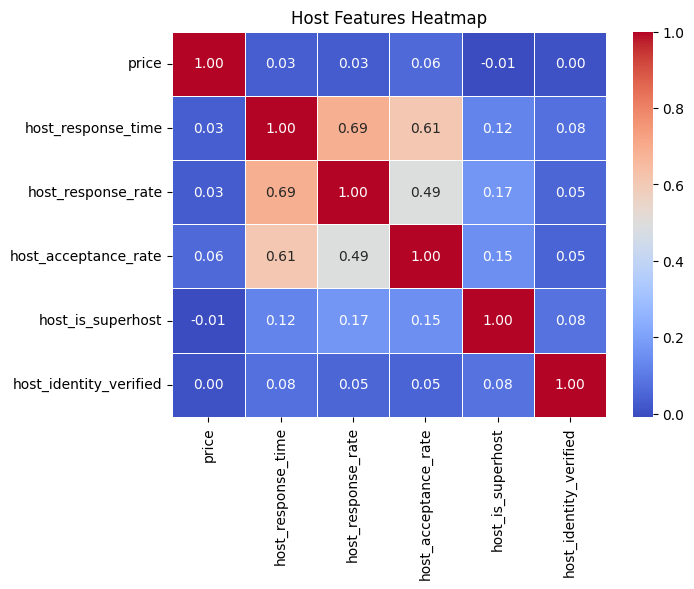

In [62]:
# generate heatmap
corr_host = df_cleaned[host_attributes].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_host, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Host Features Heatmap")
plt.show()

Lack of variance in data (i.e. actual numerical value) makes it hard to see positive relationships in heatmaps

It would be better to see other forms of analysis.

**Response Time**

Deos response time seem to affect pricing? It seems to be somewhat affected.

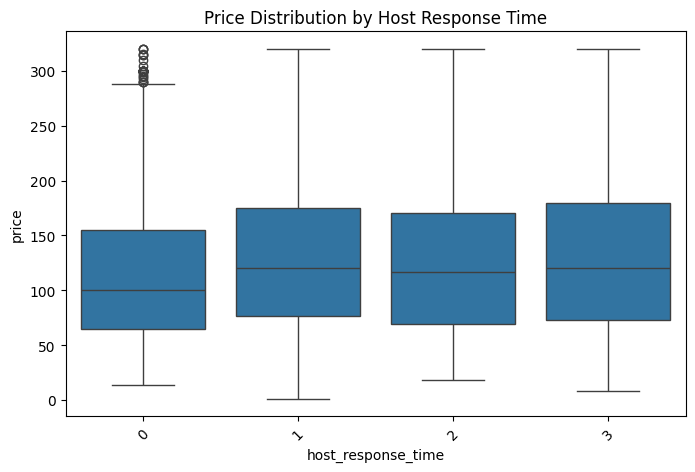

In [63]:
# Host response time vs. Price
plt.figure(figsize=(8, 5))
sns.boxplot(x="host_response_time", y="price", data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Price Distribution by Host Response Time")
plt.show()

Do higher response/acceptance rates lead to higher/lower prices?
Are there clusters of hosts charging extreme prices with low engagement?

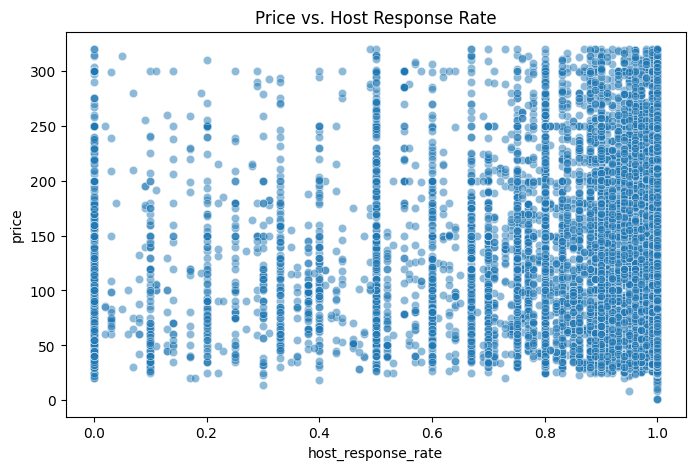

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="host_response_rate", y="price", data=df_cleaned, alpha=0.5)
plt.title("Price vs. Host Response Rate")
plt.show()

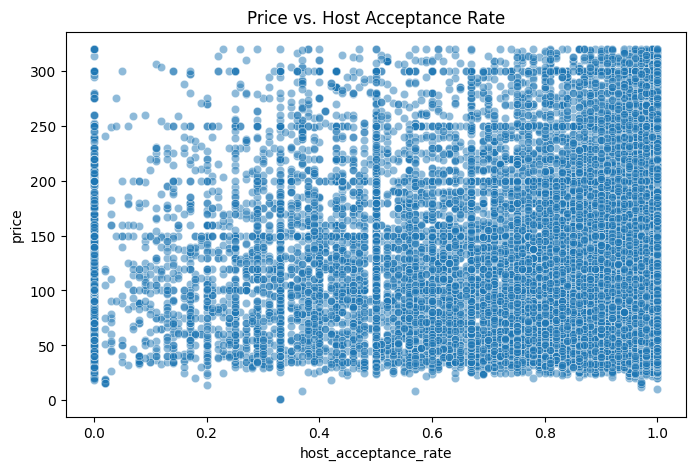

In [65]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="host_acceptance_rate", y="price", data=df_cleaned, alpha=0.5)
plt.title("Price vs. Host Acceptance Rate")
plt.show()

131.30727186311788
host_response_time
0    117.582208
2    127.416516
1    132.407762
3    132.685189
Name: price, dtype: float64
host_is_superhost
False    131.704497
True     130.391323
Name: price, dtype: float64


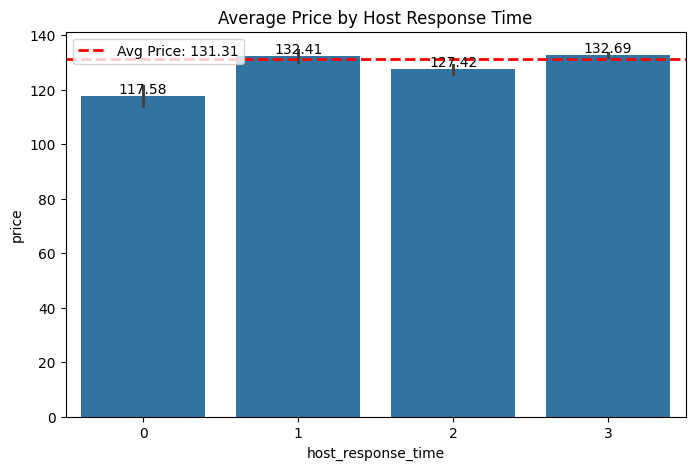

In [66]:
print(df_cleaned["price"].mean())
print(df_cleaned.groupby("host_response_time")["price"].mean().sort_values())
print(df_cleaned.groupby("host_is_superhost")["price"].mean())

# plot into bar graph
# Calculate overall average price
avg_price = df_cleaned["price"].mean()

# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="host_response_time", y="price", data=df_cleaned, estimator=lambda x: x.mean())

# Add a horizontal line for average price
plt.axhline(avg_price, color='red', linestyle='dashed', linewidth=2, label=f'Avg Price: {avg_price:.2f}')

# Annotate each bar with its mean price
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Add title and legend
plt.title("Average Price by Host Response Time")
plt.legend()
plt.show()


Are Superhosts charging more on average?

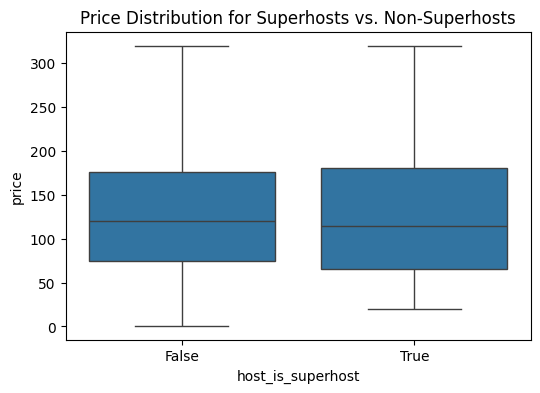

In [67]:
# Host is superhost vs. Price
plt.figure(figsize=(6, 4))
sns.boxplot(x="host_is_superhost", y="price", data=df_cleaned)
plt.title("Price Distribution for Superhosts vs. Non-Superhosts")
plt.show()

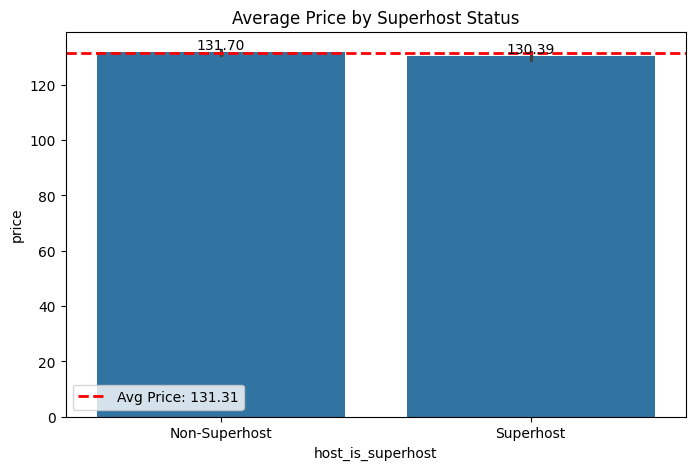

In [68]:
# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="host_is_superhost", y="price", data=df_cleaned, estimator=lambda x: x.mean())

# Add a horizontal line for average price
plt.axhline(avg_price, color='red', linestyle='dashed', linewidth=2, label=f'Avg Price: {avg_price:.2f}')

# Annotate each bar with its mean price
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Set proper xticks before setting labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["Non-Superhost", "Superhost"])

# Add title and legend
plt.title("Average Price by Superhost Status")
plt.legend()
plt.show()


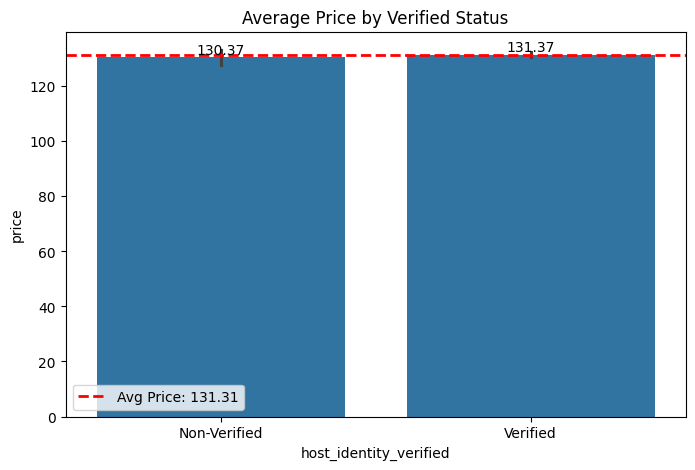

In [69]:
# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="host_identity_verified", y="price", data=df_cleaned, estimator=lambda x: x.mean())

# Add a horizontal line for average price
plt.axhline(avg_price, color='red', linestyle='dashed', linewidth=2, label=f'Avg Price: {avg_price:.2f}')

# Annotate each bar with its mean price
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Set proper xticks before setting labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["Non-Verified", "Verified"])

# Add title and legend
plt.title("Average Price by Verified Status")
plt.legend()
plt.show()

## 1.4 Review Attributes

Feature processing with features corresponding to reviews given by users for each listing.

This conists of :

* 'number_of_reviews',
* 'review_scores_rating',
* 'review_scores_accuracy',
* 'review_scores_cleanliness',
* 'review_scores_checkin',
* 'review_scores_communication',
* 'review_scores_location',
* 'review_scores_value',
* 'reviews_per_month',

In [70]:
review_attributes = ['price',
'number_of_reviews',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'reviews_per_month']
df_cleaned[review_attributes].head()

price  number_of_reviews  review_scores_rating  review_scores_accuracy  \
6   120.0                105                  4.92                    4.89   
8    40.0                 59                  4.88                    4.93   
12   83.0                268                  4.93                    4.90   
13  300.0                 61                  4.75                    4.72   
14   70.0                  7                  5.00                    4.86   

    review_scores_cleanliness  review_scores_checkin  \
6                        4.91                   4.90   
8                        4.83                   4.93   
12                       4.80                   4.97   
13                       4.43                   4.93   
14                       4.71                   5.00   

    review_scores_communication  review_scores_location  review_scores_value  \
6                          4.90                    4.74                 4.79   
8                          4.95                    4.81                 4.85   
12                         4.99                    4.90                 4.88   
13                         4.98                    4.83                 4.70   
14                         5.00                    4.86                 4.86   

    reviews_per_month  
6                0.78  
8                0.50  
12               1.81  
13               0.53  
14               0.06

In [71]:
# for number of reviews, check the mean and outliers
print(df_cleaned.number_of_reviews.describe())

count    37872.000000
mean        34.146969
std         63.099809
min          1.000000
25%          4.000000
50%         13.000000
75%         36.000000
max       1689.000000
Name: number_of_reviews, dtype: float64


In [72]:
# normalise the review scores
from sklearn.preprocessing import MinMaxScaler

# Select only the review score columns
review_cols = [
    "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
    "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"
]

# Apply MinMaxScaler (0-5 → 0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
df_cleaned[review_cols] = scaler.fit_transform(df_cleaned[review_cols])
df_cleaned[review_attributes].head()
df_cleaned_no_outliers[review_cols] = scaler.fit_transform(df_cleaned_no_outliers[review_cols])

In [73]:
# check the monthly reviews
print(df_cleaned.reviews_per_month.describe())

count    37872.000000
mean         1.432033
std          1.507131
min          0.010000
25%          0.410000
50%          0.960000
75%          1.950000
max         40.020000
Name: reviews_per_month, dtype: float64


<Axes: >

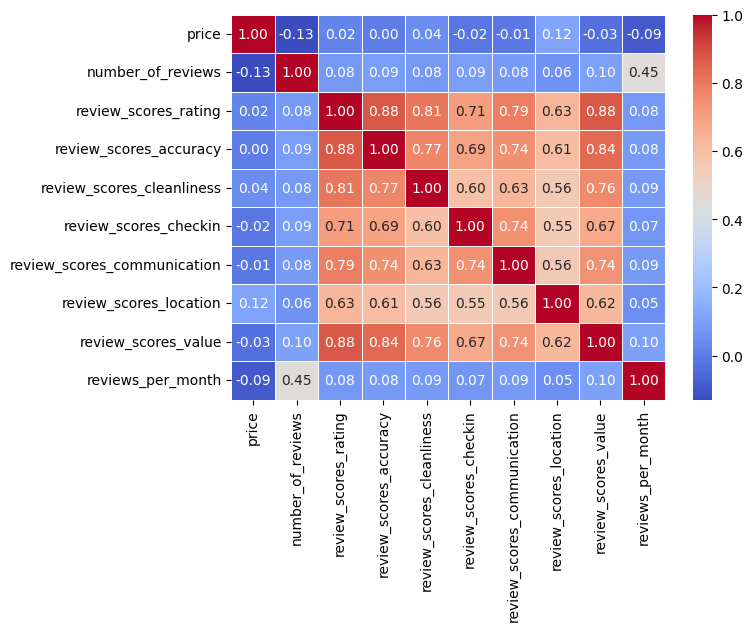

In [74]:
# heatmap
corr_review = df_cleaned[review_attributes].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_review, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

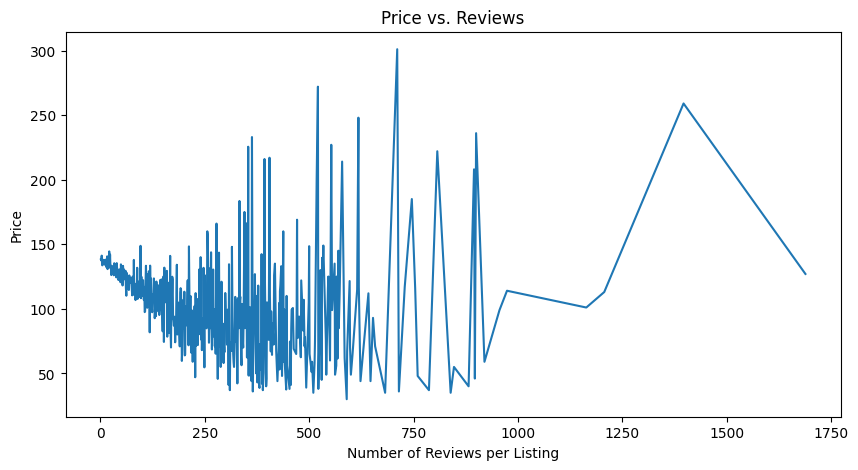

In [75]:
# prices against number of reviews
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="number_of_reviews", y="price", errorbar=None)
plt.xlabel("Number of Reviews per Listing")
plt.ylabel("Price")
plt.title("Price vs. Reviews")
plt.show()

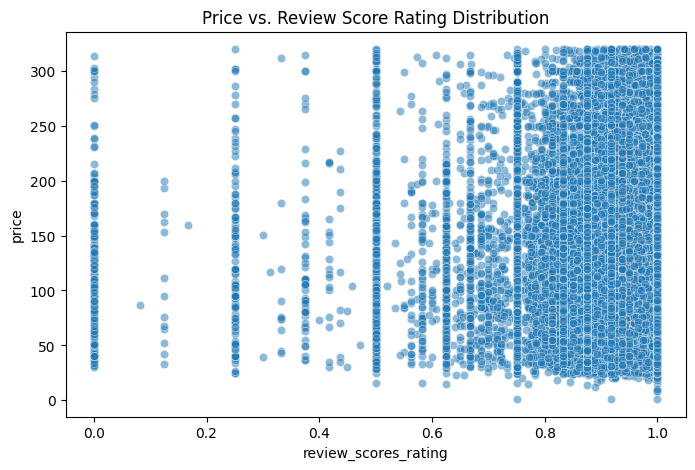

In [76]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="review_scores_rating", y="price", data=df_cleaned, alpha=0.5)
plt.title("Price vs. Review Score Rating Distribution")
plt.show()

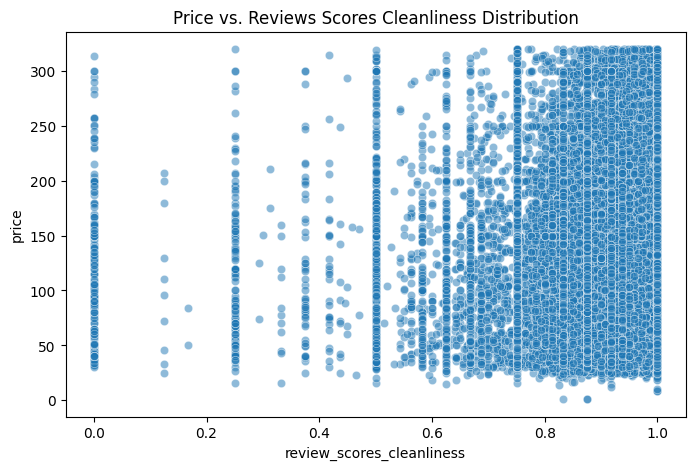

In [77]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="review_scores_cleanliness", y="price", data=df_cleaned, alpha=0.5)
plt.title("Price vs. Reviews Scores Cleanliness Distribution")
plt.show()

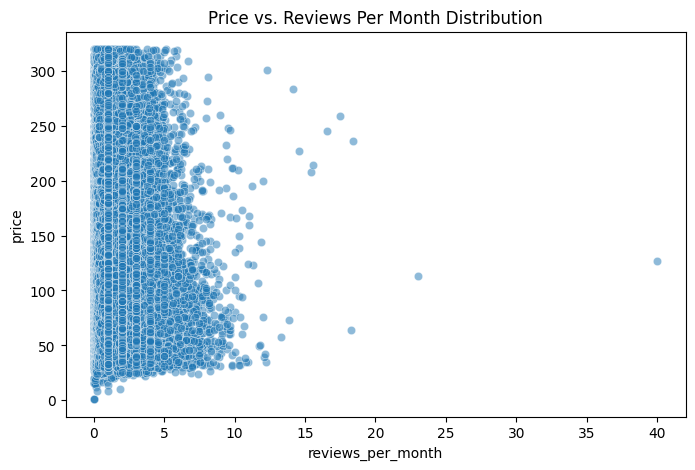

In [78]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="reviews_per_month", y="price", data=df_cleaned, alpha=0.5)
plt.title("Price vs. Reviews Per Month Distribution")
plt.show()

There's not much correlation in this dataset to warrent using the reviews statistics as a main feature.

## 1.5 AirBnB Booking Attributes

This is feature processing related to other factors related to the booking process.

This includes:

* 'minimum_nights',
* 'maximum_nights',
* 'minimum_minimum_nights',
* 'maximum_minimum_nights',
* 'minimum_maximum_nights',
* 'maximum_maximum_nights',
* 'minimum_nights_avg_ntm',
* 'availability_30',
* 'availability_60',
* 'availability_90',
* 'availability_365',
* 'instant_bookable',

In [79]:
booking_attributes = ['minimum_nights',
'maximum_nights',
'minimum_minimum_nights',
'maximum_minimum_nights',
'minimum_maximum_nights',
'maximum_maximum_nights',
'minimum_nights_avg_ntm',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'instant_bookable']
df_cleaned[booking_attributes].head()

minimum_nights  maximum_nights  minimum_minimum_nights  \
6                5             120                     3.0   
8                7              35                     7.0   
12               1             365                     1.0   
13               2             365                     2.0   
14               2              30                     2.0   

    maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
6                     90.0                   120.0                   120.0   
8                      7.0                    35.0                    35.0   
12                     1.0                   365.0                   365.0   
13                     2.0                   365.0                   365.0   
14                     2.0                    30.0                    30.0   

    minimum_nights_avg_ntm  availability_30  availability_60  availability_90  \
6                      7.7                6                6               15   
8                      7.0                6               36               66   
12                     1.0                9               37               67   
13                     2.0               10               40               70   
14                     2.0                0                0               29   

    availability_365 instant_bookable  
6                 32                t  
8                 66                f  
12               147                f  
13               344                f  
14               304                f

In [80]:
# can consider dropping some of the columns here due to redundancy
print(df_cleaned["minimum_nights"].unique())
print(df_cleaned["minimum_nights"].value_counts())
print(df_cleaned["maximum_nights"].unique())
print(df_cleaned["maximum_nights"].value_counts())

[  5   7   1   2   4   3  30  18  10   8   6  91  90  32  14  21  65   9
  12  28  50  26  45  60  15  58  95  20  22  35  75  13 170  56 100  25
  88  55 120  40  54  16  19  87  80 183 180  85  11  27  76  78 108  59
  31  24  79  37  89  86  52  62 360  29 116  98 160 190  42  73 365 200
  33  23  92 277 245 999  49  70 363 119 358 500]
minimum_nights
1      12702
2       9904
3       7410
4       2244
5       1902
       ...  
70         1
363        1
119        1
358        1
500        1
Name: count, Length: 84, dtype: int64
[      120        35       365        30        29      1125        22
       730         8        14        90        20        21        28
        89        60         7       180        16        31        42
       200        96       300        15        27        45       330
        10         5       100         9        12       760       155
       700      9011       250        58       600       360        70
        40       130        62      

In [81]:
# check the availabilty columns
print(df_cleaned['availability_30'].unique())
print(df_cleaned['availability_30'].value_counts())
print(df_cleaned['availability_60'].unique())
print(df_cleaned['availability_60'].value_counts())
print(df_cleaned['availability_90'].unique())
print(df_cleaned['availability_90'].value_counts())
print(df_cleaned['availability_365'].unique())
print(df_cleaned['availability_365'].value_counts())

[ 6  9 10  0 14 21  1 29  7 25 19 15  3 11  4 27  2 23 12 30 18 16  5 26
 28 20 13 24 22  8 17]
availability_30
0     4045
9     1772
10    1589
30    1528
11    1514
8     1505
12    1483
13    1430
7     1411
14    1368
15    1335
29    1328
6     1294
5     1240
16    1200
4     1184
17    1118
18    1069
19    1061
20     968
3      914
21     904
2      869
22     833
1      824
23     824
28     673
27     669
24     659
25     650
26     611
Name: count, dtype: int64
[ 6 36 37 40  0 44 51  9 17 59 55 39 49 45 48  4 25 57 11  1 41 10 53 42
 60 46 30  5 15 56 16 22 58 12 50 34 29  2 32 43 35 26 14 33 28  8  7 13
 38 21 19 31  3 47 54 27 23 20 52 18 24]
availability_60
0     2417
60    1426
59    1237
39    1082
40     961
      ... 
6      349
12     344
2      338
4      331
3      329
Name: count, Length: 61, dtype: int64
[15 66 67 70 29 74  4 81 39 46 89 85 69 79 75 78 27 37 11 87  0  3 71 13
 83 72 90 42 76  1 49 22  5 86 60 52 88 26 80 64 41 17 53 43 65 31 38 12
 73  2 20 14 

In [82]:
# can drop the min-min nights, max-min nights, min-max nights, max-max nights, kinda redundant
# print(len(df_cleaned.columns))
# df_cleaned.drop(columns=["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights"], inplace=True)
# df_cleaned_no_outliers.drop(columns=["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights"], inplace=True)
# print(len(df_cleaned.columns))

Leave availabilty as it is. Leave the average nights as well.

In [83]:
# map instant bookable
df_cleaned["instant_bookable"] = df_cleaned["instant_bookable"].map({"t": True, "f": False})
df_cleaned_no_outliers["instant_bookable"] = df_cleaned_no_outliers["instant_bookable"].map({"t": True, "f": False})
df_cleaned["instant_bookable"].head()

6      True
8     False
12    False
13    False
14    False
Name: instant_bookable, dtype: bool

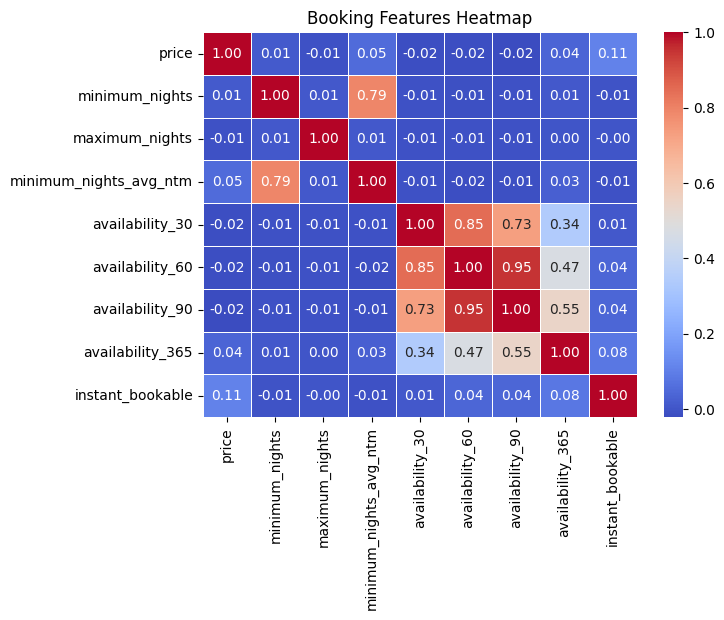

In [84]:
# heatmap the shit
corr_columns = ['price',
'minimum_nights',
'maximum_nights',
'minimum_nights_avg_ntm',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'instant_bookable']

corr_host = df_cleaned[corr_columns].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_host, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Booking Features Heatmap")
plt.show()

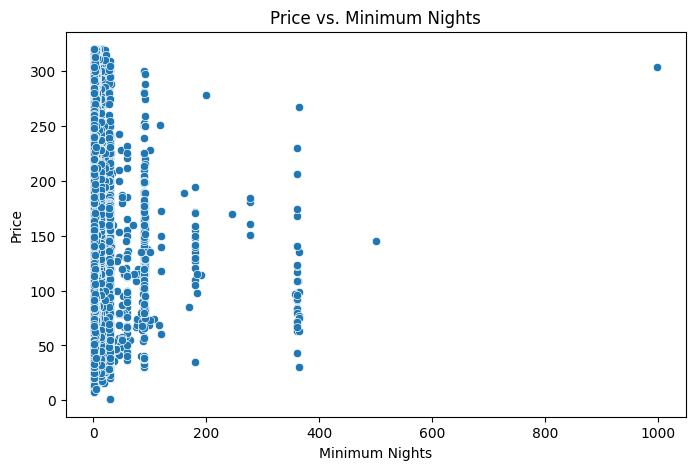

In [85]:
# Check minimum nights graph against price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned["minimum_nights"], y=df_cleaned["price"])
plt.title("Price vs. Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Price")
plt.show()


The booking attributes seem to have poor correlated attributes. For now, only the features *avaliabilty_365* and *instant_bookable* seem to be worth looking into.

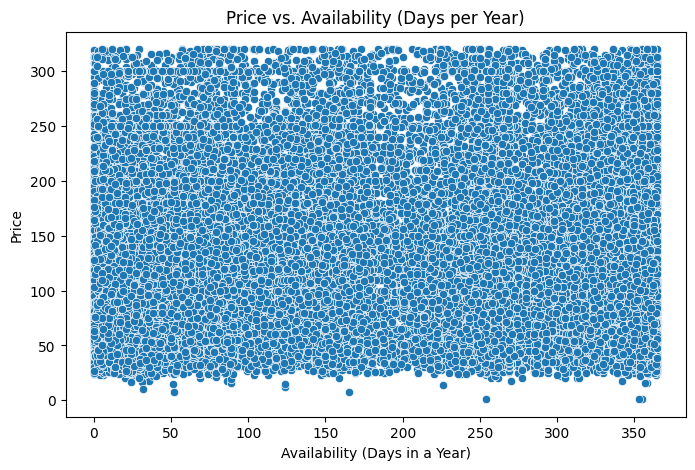

In [86]:
# analyse availabilty_365
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned["availability_365"], y=df_cleaned["price"])
plt.title("Price vs. Availability (Days per Year)")
plt.xlabel("Availability (Days in a Year)")
plt.ylabel("Price")
plt.show()


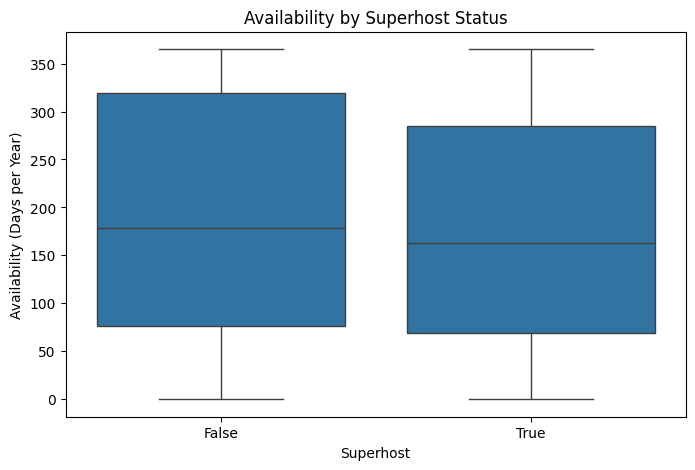

In [87]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned["host_is_superhost"], y=df_cleaned["availability_365"])
plt.title("Availability by Superhost Status")
plt.xlabel("Superhost")
plt.ylabel("Availability (Days per Year)")
plt.show()


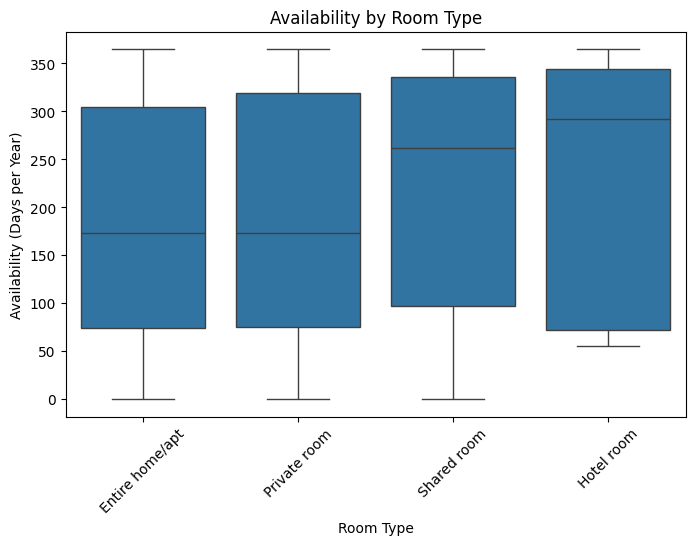

In [88]:
df_viz = df_cleaned.copy()  # Create a copy to avoid modifying the original data
room_col = ['room_type_Entire home/apt','room_type_Hotel room',	'room_type_Private room',	'room_type_Shared room']

# Convert one-hot encoded columns back to a single categorical column
df_viz["room_type"] = df_viz[room_col].idxmax(axis=1).str.replace("room_type_", "")

# Now plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_viz["room_type"], y=df_viz["availability_365"])
plt.title("Availability by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Availability (Days per Year)")
plt.xticks(rotation=45)
plt.show()


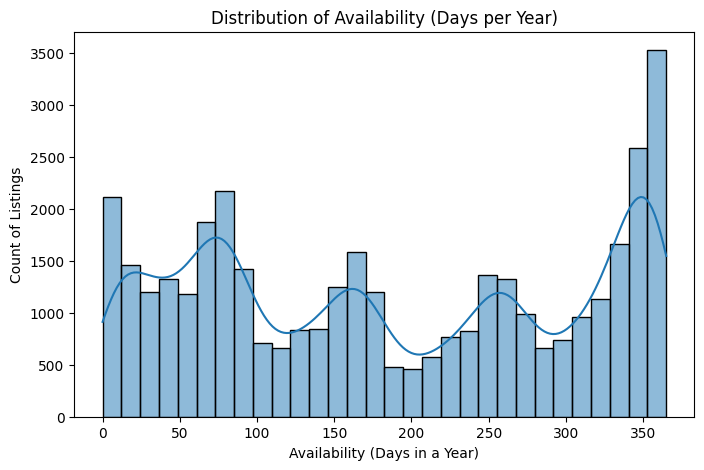

In [89]:
# See distribution of availabilty
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["availability_365"], bins=30, kde=True)
plt.title("Distribution of Availability (Days per Year)")
plt.xlabel("Availability (Days in a Year)")
plt.ylabel("Count of Listings")
plt.show()


It is hard to see any kind of relationship here.

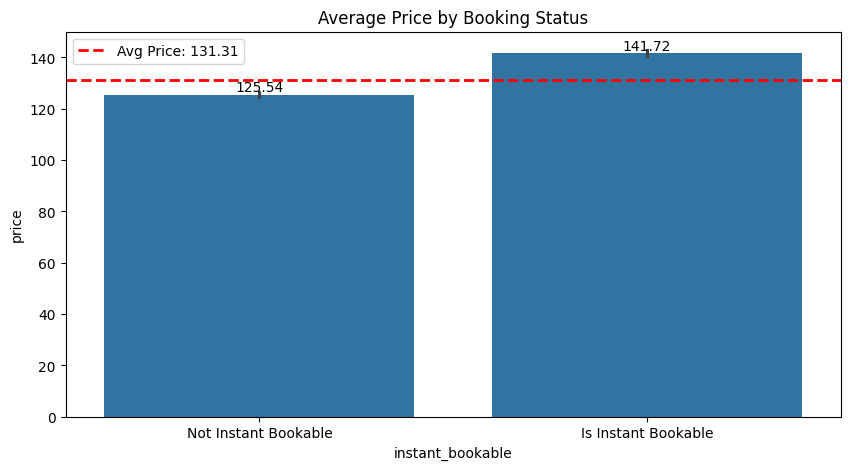

In [90]:
# Create bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="instant_bookable", y="price", data=df_cleaned, estimator=lambda x: x.mean())

# Add a horizontal line for average price
plt.axhline(avg_price, color='red', linestyle='dashed', linewidth=2, label=f'Avg Price: {avg_price:.2f}')

# Annotate each bar with its mean price
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Set proper xticks before setting labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Instant Bookable", "Is Instant Bookable"])

# Add title and legend
plt.title("Average Price by Booking Status")
plt.legend()
plt.show()

## 1.6 Final Findings

Use most of the property/physical attributes, Host attributes maybe, reviews are not so good, Booking attributes only use some. fuck the location anyone want do that have fun lazy

WIP, do later

In [91]:
print(df_cleaned.columns)
# drop the following
drop_list = ['minimum_nights',
'maximum_nights',
'minimum_minimum_nights',
'maximum_minimum_nights',
'minimum_maximum_nights',
'maximum_maximum_nights',
'minimum_nights_avg_ntm',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'name',
'description',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'host_identity_verified',
'amenities',
'neighbourhood_cleansed',
'longitude',
'latitude'
# ,'distance_to_nearest_station']
]
df_cleaned = df_cleaned.drop(columns=drop_list)
# df_cleaned_no_outliers = df_cleaned_no_outliers.drop(columns=drop_list)

Index(['name', 'description', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'has_wifi', 'has_kitchen', 'has_pool', 'has_air_conditioning',
       'has_security', 'has_laundry', 'has_bathroom', 'has_entertainment',
       'has_fitness', 

In [92]:
print(df_cleaned.columns)
print(len(df_cleaned.columns))
df_cleaned.head(3)

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'reviews_per_month', 'has_wifi', 'has_kitchen',
       'has_pool', 'has_air_conditioning', 'has_security', 'has_laundry',
       'has_bathroom', 'has_entertainment', 'has_fitness',
       'has_child_friendly', 'has_outdoor', 'has_elevator',
       'has_ethernet_connection', 'has_coffee_maker', 'has_stove',
       'has_microwave', 'has_refrigerator', 'has_bbq_grill',
       'has_dining_table', 'has_oven', 'has_ev_charger', 'has_hot_tub',
       'has_heating', 'has_ceiling_fan', 'has_fire_extinguisher',
       'has_smoke_alarm', 'has_carbon_monoxide_alarm', 'has_washer',
       'has_dryer', 'has_clothing_storage', 'has_iron', 'has_bidet',
       'has_conditioner', 'has_shampoo', 'has_bathtub', 'has_hot_water',
       'has_hdtv', 'has_game_console', 'ha

host_response_time  host_response_rate  host_acceptance_rate  \
6                    3                 1.0                  1.00   
8                    2                 1.0                  0.00   
12                   3                 1.0                  0.79   

    host_is_superhost  accommodates  bathrooms  bedrooms  beds  price  \
6               False             6        2.0       2.0   3.0  120.0   
8               False             1        1.0       1.0   1.0   40.0   
12               True             4        1.5       1.0   1.0   83.0   

    number_of_reviews  ...  has_gym  has_children’s_books_and_toys  has_crib  \
6                 105  ...    False                          False     False   
8                  59  ...    False                          False     False   
12                268  ...    False                          False      True   

    has_baby_bath  has_high_chair  has_backyard  room_type_Entire home/apt  \
6           False           False         False                       True   
8           False           False         False                      False   
12          False           False         False                      False   

    room_type_Hotel room  room_type_Private room  room_type_Shared room  
6                  False                   False                  False  
8                  False                    True                  False  
12                 False                    True                  False  

[3 rows x 63 columns]

# 2. Data Fitting

Place the relevant factors to be used for training and testing model

To be done

In [93]:
from sklearn.cluster import KMeans

# Ensure no division by zero (adding +1)
df_cleaned["room_density"] = df_cleaned["beds"] / (df_cleaned["bedrooms"] + 1)
df_cleaned["space_per_bed"] = df_cleaned["accommodates"] / (df_cleaned["beds"] + 1)

# Log Transform (if needed)
df_cleaned["log_accommodation"] = np.log1p(df_cleaned["accommodates"])
df_cleaned["log_bedrooms"] = np.log1p(df_cleaned["bedrooms"])
df_cleaned["log_beds"] = np.log1p(df_cleaned["beds"])

# Polynomial Features
df_cleaned["bedrooms_squared"] = df_cleaned["bedrooms"] ** 2
df_cleaned["beds_squared"] = df_cleaned["beds"] ** 2
df_cleaned["accommodation_beds_interaction"] = df_cleaned["accommodates"] * df_cleaned["beds"]

# K-Means Clustering (Choose a reasonable number of clusters, e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned["room_cluster"] = kmeans.fit_predict(df_cleaned[["accommodates", "bedrooms", "beds"]])

engineered_cols = ['price',
                   'room_density',
                   'space_per_bed',
                   'log_accommodation',
                   'log_bedrooms',
                   'log_beds',
                   'bedrooms_squared',
                   'beds_squared',
                   'accommodation_beds_interaction',
                   'room_cluster']

# Display the first few rows to check the new features
df_cleaned[engineered_cols].head()


price  room_density  space_per_bed  log_accommodation  log_bedrooms  \
6   120.0          1.00           1.50           1.945910      1.098612   
8    40.0          0.50           0.50           0.693147      0.693147   
12   83.0          0.50           2.00           1.609438      0.693147   
13  300.0          0.75           2.25           2.302585      1.386294   
14   70.0          0.50           1.00           1.098612      0.693147   

    log_beds  bedrooms_squared  beds_squared  accommodation_beds_interaction  \
6   1.386294               4.0           9.0                            18.0   
8   0.693147               1.0           1.0                             1.0   
12  0.693147               1.0           1.0                             4.0   
13  1.386294               9.0           9.0                            27.0   
14  0.693147               1.0           1.0                             2.0   

    room_cluster  
6              0  
8              1  
12             2  
13             3  
14             1

In [94]:
# Compute correlation with target variable (e.g., 'price')
corr_matrix = df_cleaned[engineered_cols].corr()

# Sort correlations to see the strongest ones
corr_with_target = corr_matrix["price"].sort_values(ascending=False)
print(corr_with_target)

price                             1.000000
log_accommodation                 0.636160
log_beds                          0.466474
log_bedrooms                      0.460087
accommodation_beds_interaction    0.459202
bedrooms_squared                  0.432577
space_per_bed                     0.371483
beds_squared                      0.363967
room_density                      0.241986
room_cluster                      0.131064
Name: price, dtype: float64


In [95]:
# Drop the least correlated engineered features     
df_cleaned.drop(columns=['room_cluster','space_per_bed', 'room_density'])

host_response_time  host_response_rate  host_acceptance_rate  \
6                       3                1.00                  1.00   
8                       2                1.00                  0.00   
12                      3                1.00                  0.79   
13                      3                1.00                  0.79   
14                      3                1.00                  0.50   
...                   ...                 ...                   ...   
94669                   3                0.97                  1.00   
94785                   3                1.00                  0.67   
94799                   3                1.00                  1.00   
94985                   3                1.00                  1.00   
95065                   3                1.00                  0.95   

       host_is_superhost  accommodates  bathrooms  bedrooms  beds  price  \
6                  False             6        2.0       2.0   3.0  120.0   
8                  False             1        1.0       1.0   1.0   40.0   
12                  True             4        1.5       1.0   1.0   83.0   
13                  True             9        1.0       3.0   3.0  300.0   
14                 False             2        1.0       1.0   1.0   70.0   
...                  ...           ...        ...       ...   ...    ...   
94669              False             3        1.0       2.0   2.0  149.0   
94785              False             2        0.5       1.0   1.0   51.0   
94799              False             3        1.5       1.0   2.0  113.0   
94985              False             2        1.0       1.0   1.0   68.0   
95065               True             3        1.0       1.0   1.0  141.0   

       number_of_reviews  ...  room_type_Entire home/apt  \
6                    105  ...                       True   
8                     59  ...                      False   
12                   268  ...                      False   
13                    61  ...                       True   
14                     7  ...                      False   
...                  ...  ...                        ...   
94669                  1  ...                       True   
94785                  1  ...                      False   
94799                  1  ...                       True   
94985                  1  ...                       True   
95065                  1  ...                      False   

       room_type_Hotel room  room_type_Private room  room_type_Shared room  \
6                     False                   False                  False   
8                     False                    True                  False   
12                    False                    True                  False   
13                    False                   False                  False   
14                    False                    True                  False   
...                     ...                     ...                    ...   
94669                 False                   False                  False   
94785                 False                    True                  False   
94799                 False                   False                  False   
94985                 False                   False                  False   
95065                 False                    True                  False   

       log_accommodation  log_bedrooms  log_beds  bedrooms_squared  \
6               1.945910      1.098612  1.386294               4.0   
8               0.693147      0.693147  0.693147               1.0   
12              1.609438      0.693147  0.693147               1.0   
13              2.302585      1.386294  1.386294               9.0   
14              1.098612      0.693147  0.693147               1.0   
...                  ...           ...       ...               ...   
94669           1.386294      1.098612  1.098612               4.0   
94785           1.09861

In [96]:
df_cleaned.columns.to_list()

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'number_of_reviews',
 'review_scores_rating',
 'instant_bookable',
 'reviews_per_month',
 'has_wifi',
 'has_kitchen',
 'has_pool',
 'has_air_conditioning',
 'has_security',
 'has_laundry',
 'has_bathroom',
 'has_entertainment',
 'has_fitness',
 'has_child_friendly',
 'has_outdoor',
 'has_elevator',
 'has_ethernet_connection',
 'has_coffee_maker',
 'has_stove',
 'has_microwave',
 'has_refrigerator',
 'has_bbq_grill',
 'has_dining_table',
 'has_oven',
 'has_ev_charger',
 'has_hot_tub',
 'has_heating',
 'has_ceiling_fan',
 'has_fire_extinguisher',
 'has_smoke_alarm',
 'has_carbon_monoxide_alarm',
 'has_washer',
 'has_dryer',
 'has_clothing_storage',
 'has_iron',
 'has_bidet',
 'has_conditioner',
 'has_shampoo',
 'has_bathtub',
 'has_hot_water',
 'has_hdtv',
 'has_game_console',
 'has_tv',
 'has_exercise_equipment',
 'has_gym',
 'has_c

# 3. Model Training



In [97]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Linear**

Linear Regression Results:
MAE: 35.73
MSE: 2246.57
RMSE: 47.40
R² Score: 0.5670
Training Time: 0.0510 seconds
Prediction Time: 0.003503 seconds


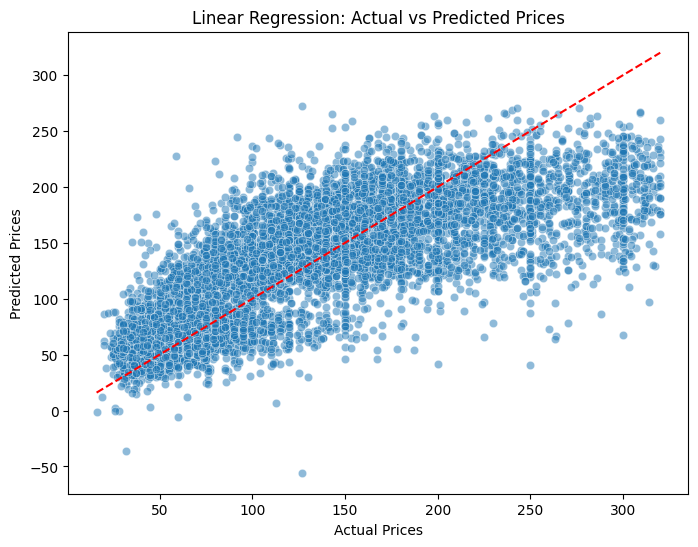

In [98]:
# 🔹 Split data into training and testing sets (80-20 split)
linear_X = df_cleaned.drop(columns='price')  # Features
linear_y = df_cleaned['price']  # Target Variable

linear_X_train, linear_X_test, linear_y_train, linear_y_test = train_test_split(
    linear_X, linear_y, test_size=0.2, random_state=42
)

# 🔹 Initialize and train Linear Regression model
lr_model = LinearRegression()
# Start timer
start_time = time.time()
# train
lr_model.fit(linear_X_train, linear_y_train)
# End timer
training_time_lr = time.time() - start_time

# 🔹 Make predictions
start_time = time.time()
linear_y_pred_lr = lr_model.predict(linear_X_test)
# End timer
prediction_time_lr= time.time() - start_time

# 🔹 Evaluate the model
mae_lr = mean_absolute_error(linear_y_test, linear_y_pred_lr)
mse_lr = mean_squared_error(linear_y_test, linear_y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(linear_y_test, linear_y_pred_lr)

# 🔹 Print Evaluation Metrics
print(f"Linear Regression Results:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")
print(f"Training Time: {training_time_lr:.4f} seconds")
print(f"Prediction Time: {prediction_time_lr:.6f} seconds")

# 🔹 Plot Actual vs Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=linear_y_test, y=linear_y_pred_lr, alpha=0.5)
plt.plot([linear_y_test.min(), linear_y_test.max()],
         [linear_y_test.min(), linear_y_test.max()],
         color='red', linestyle='dashed')  # Perfect predictions line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.show()

## **SVM**

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
X = df_cleaned.drop(columns=['price'])
y = df_cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Training set shape (scaled):", X_train_scaled.shape)
print("Test set shape (scaled):", X_test_scaled.shape)


Training set shape: (30297, 71)
Test set shape: (7575, 71)
Training set shape (scaled): (30297, 71)
Test set shape (scaled): (7575, 71)


### Baseline SVM (linear + poly)

In [106]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [103]:
# Train SVR with linear kernel on scaled data
svm_linear = SVR(kernel='linear', C=1.0)
start_time = time.time()
svm_linear.fit(X_train_scaled, y_train)
training_time_svm_base = time.time() - start_time
start_time = time.time()
y_pred_linear = svm_linear.predict(X_test_scaled)
prediction_time_svm_base = time.time() - start_time

# Train SVR with polynomial kernel (degree=3) on scaled data
svm_poly = SVR(kernel='poly', C=1.0, degree=3)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)

# Ensemble prediction: average of linear and poly
y_pred_baseline = (y_pred_linear + y_pred_poly) / 2

def evaluate_model(y_true, y_pred, model_name):
    """Compute and print evaluation metrics for a model."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Performance Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    return r2, mae, rmse

print("\n--- 5.1 Baseline SVM (Linear + Poly) ---")
r2_base, mae_base, rmse_base = evaluate_model(y_test, y_pred_baseline, "Baseline SVM (Linear + Poly)")
print(f"Training Time: {training_time_svm_base:.4f} seconds")
print(f"Prediction Time: {prediction_time_svm_base:.6f} seconds")


--- 5.1 Baseline SVM (Linear + Poly) ---

📊 Baseline SVM (Linear + Poly) Performance Metrics:
R² Score: 0.5183
Mean Absolute Error (MAE): 36.17
Root Mean Squared Error (RMSE): 49.99
Training Time: 43.3785 seconds
Prediction Time: 5.494616 seconds


### Bayesian Tuned SVM (Linear + Poly)

In [105]:
print("\n--- 5.2 Bayesian Tuned SVM (Linear + Poly) ---")
# Define hyperparameter search space
param_space = {
    'C': (0.1, 100.0, 'log-uniform'),
    'epsilon': (0.01, 10.0, 'log-uniform')
}
# Bayesian optimization for linear SVM with reduced iterations and CV
svm_linear_bayes = BayesSearchCV(
    estimator=SVR(kernel='linear'),
    search_spaces=param_space,
    n_iter=5,
    cv=2,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
svm_linear_bayes.fit(X_train_scaled, y_train)
print("Best parameters for linear SVM:", svm_linear_bayes.best_params_)
y_pred_linear_bayes = svm_linear_bayes.predict(X_test_scaled)

# Bayesian optimization for polynomial SVM (degree=3) with reduced iterations and CV
svm_poly_bayes = BayesSearchCV(
    estimator=SVR(kernel='poly', degree=3),
    search_spaces=param_space,
    n_iter=5,
    cv=2,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
svm_poly_bayes.fit(X_train_scaled, y_train)
print("Best parameters for polynomial SVM:", svm_poly_bayes.best_params_)
y_pred_poly_bayes = svm_poly_bayes.predict(X_test_scaled)

# Ensemble tuned predictions
y_pred_bayes = (y_pred_linear_bayes + y_pred_poly_bayes) / 2

r2_bayes, mae_bayes, rmse_bayes = evaluate_model(y_test, y_pred_bayes, "Bayesian Tuned SVM (Linear + Poly)")



--- 5.2 Bayesian Tuned SVM (Linear + Poly) ---
Best parameters for linear SVM: OrderedDict({'C': 32.52108800594495, 'epsilon': 4.466278825224283})
Best parameters for polynomial SVM: OrderedDict({'C': 32.52108800594495, 'epsilon': 4.466278825224283})

📊 Bayesian Tuned SVM (Linear + Poly) Performance Metrics:
R² Score: 0.5715
Mean Absolute Error (MAE): 33.98
Root Mean Squared Error (RMSE): 47.15


### Blended Model (SVM + XGBoost + LightGBM) with Scaled Data

In [107]:
print("\n--- 5.3 Blended Model (SVM+XGB+LGB) ---")
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Train a baseline SVM (linear kernel) on scaled data
svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Train LightGBM
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train_scaled, y_train)
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Blend predictions (simple average)
y_pred_blend = (y_pred_svm + y_pred_xgb + y_pred_lgb) / 3
r2_blend, mae_blend, rmse_blend = evaluate_model(y_test, y_pred_blend, "Blended Model (SVM+XGB+LGB)")



--- 5.3 Blended Model (SVM+XGB+LGB) ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1171
[LightGBM] [Info] Number of data points in the train set: 30297, number of used features: 71
[LightGBM] [Info] Start training from score 131.138132

📊 Blended Model (SVM+XGB+LGB) Performance Metrics:
R² Score: 0.6068
Mean Absolute Error (MAE): 33.25
Root Mean Squared Error (RMSE): 45.17


c:\Users\avera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### Advanced Stacking (SVM + XGBoost + LightGBM + Ridge) with Scaled Data

In [108]:
print("\n--- 5.4 Advanced Stacking (SVM+XGB+LGB+Ridge) ---")
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define base estimators (without RF)
estimators = [
    ('svm', SVR(kernel='linear', C=1.0)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('lgb', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]
# Stacking regressor with Ridge as meta-learner
stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(),
    cv=5,
    n_jobs=-1
)
stacking_reg.fit(X_train_scaled, y_train)
y_pred_stack = stacking_reg.predict(X_test_scaled)
r2_stack, mae_stack, rmse_stack = evaluate_model(y_test, y_pred_stack, "Advanced Stacking (SVM+XGB+LGB+Ridge)")


--- 5.4 Advanced Stacking (SVM+XGB+LGB+Ridge) ---

📊 Advanced Stacking (SVM+XGB+LGB+Ridge) Performance Metrics:
R² Score: 0.6172
Mean Absolute Error (MAE): 32.90
Root Mean Squared Error (RMSE): 44.57


c:\Users\avera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### Feature Importance

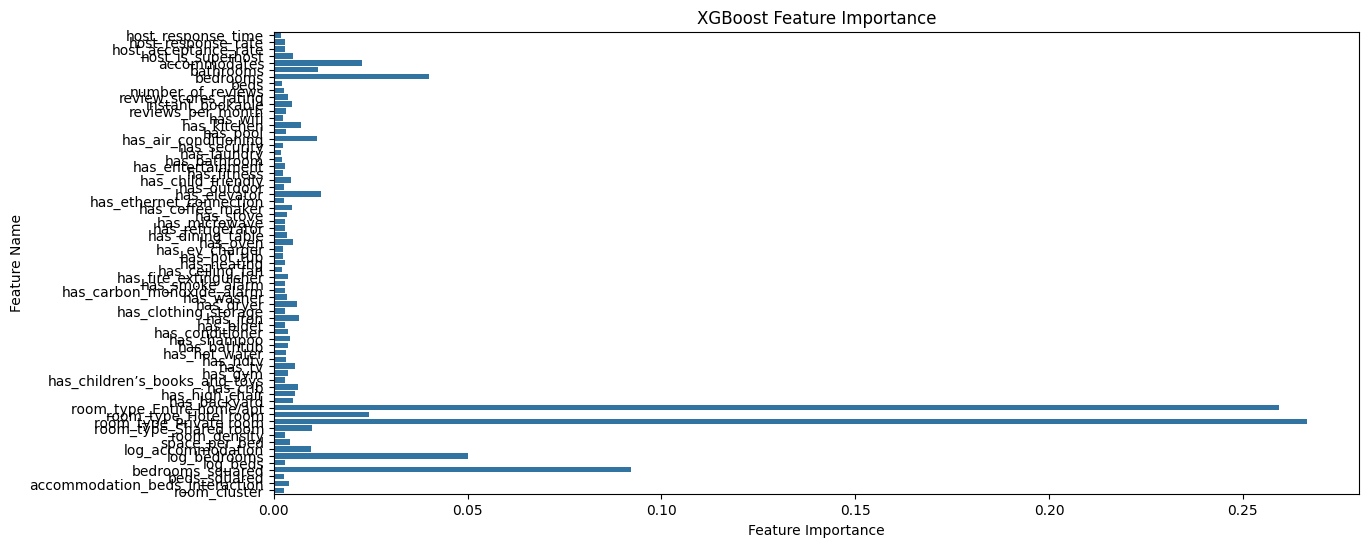

In [117]:
# ✅ Feature Importance (Optional)
plt.figure(figsize=(14,6))
sns.barplot(x=xgboost_model.feature_importances_, y=treeXG_X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.show()

### Results For SVM

In [110]:
# -------------------------------
# 6. Summary of Results
# -------------------------------
print("\n=== Summary of Model Performance ===")
results_summary = pd.DataFrame({
    'Model': [
        'Baseline SVM (Linear+Poly)',
        'Bayesian Tuned SVM (Linear+Poly)',
        'Blended Model (SVM+XGB+LGB)',
        'Advanced Stacking (SVM+XGB+LGB+Ridge)'
    ],
    'R² Score': [r2_base, r2_bayes, r2_blend, r2_stack],
    'MAE': [mae_base, mae_bayes, mae_blend, mae_stack],
    'RMSE': [rmse_base, rmse_bayes, rmse_blend, rmse_stack]
})
print(results_summary)


=== Summary of Model Performance ===
                                   Model  R² Score        MAE       RMSE
0             Baseline SVM (Linear+Poly)  0.518344  36.172232  49.992498
1       Bayesian Tuned SVM (Linear+Poly)  0.571471  33.984486  47.154869
2            Blended Model (SVM+XGB+LGB)  0.606797  33.254262  45.169448
3  Advanced Stacking (SVM+XGB+LGB+Ridge)  0.617243  32.895776  44.565406


## Tree

Predicted Prices: [188.78996865  65.85714286 180.43589744 ... 142.47177419 156.751693
 245.23287671]
Mean Absolute Error (MAE): 35.46172860612334
Mean Squared Error (MSE): 2358.34708827879
Root Mean Squared Error (RMSE): 48.56281590145685
R² Score: 0.5454986840842424


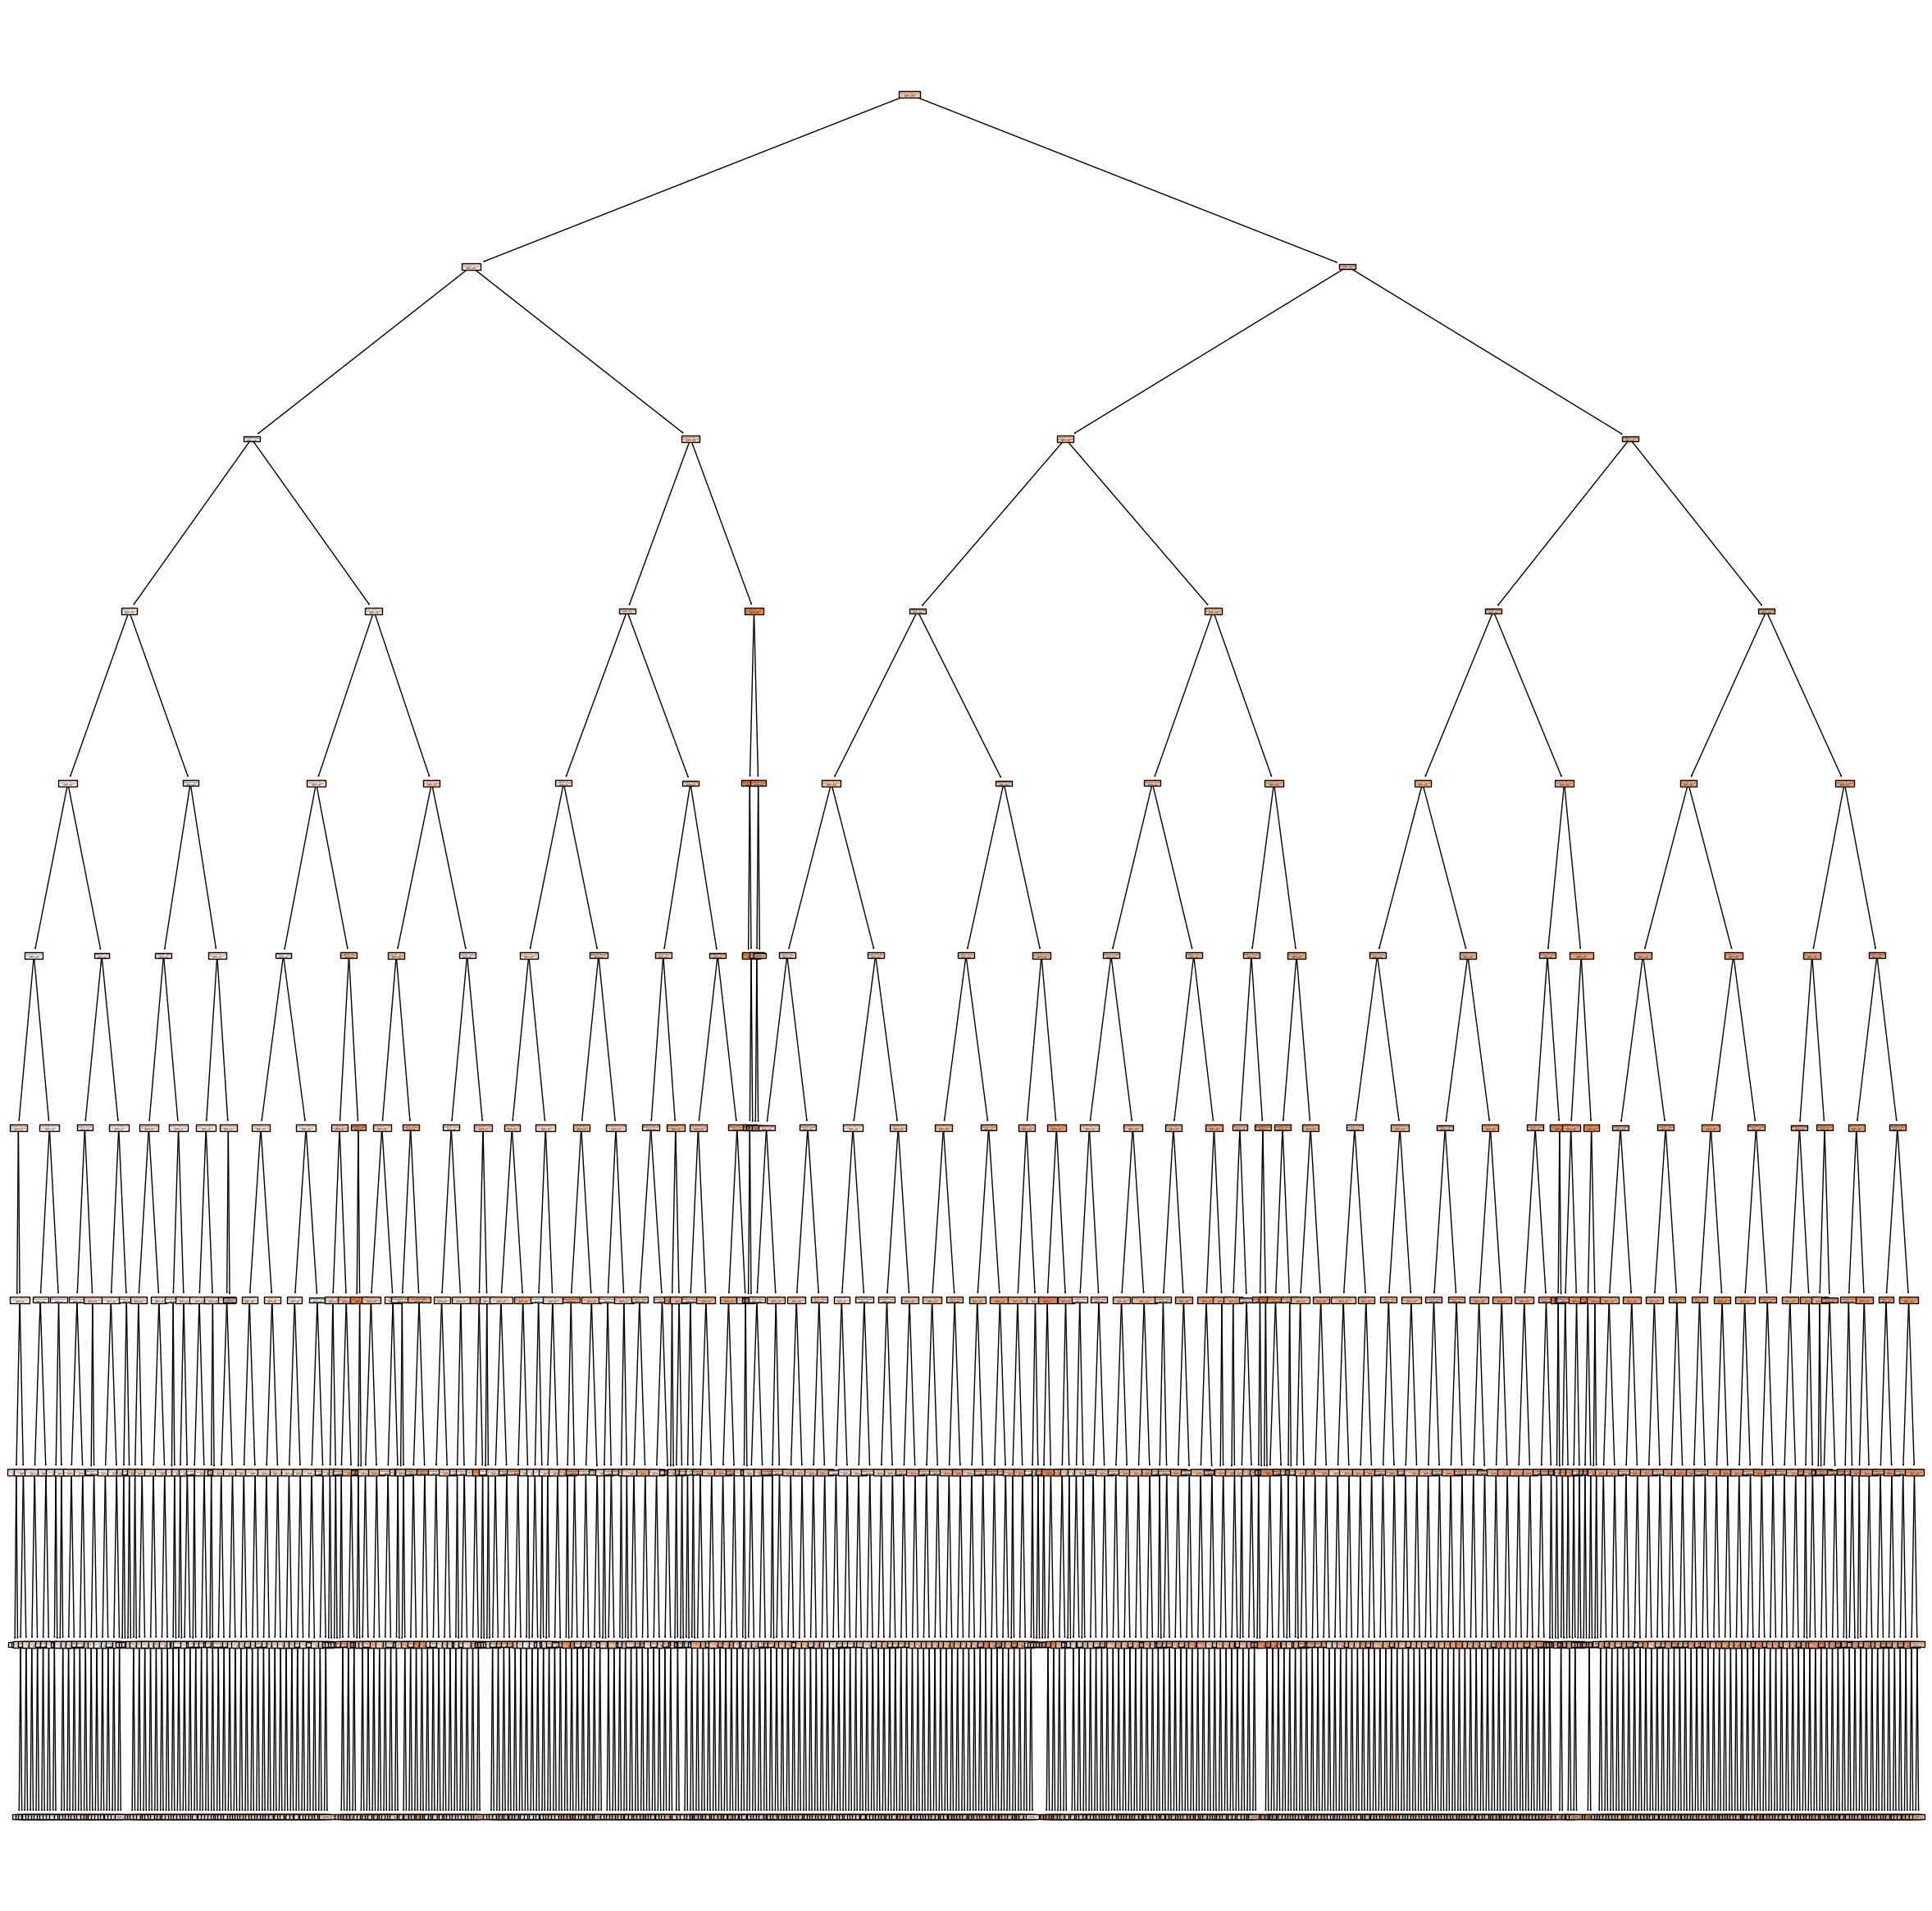

In [113]:
# Chris basement WIP


from sklearn.tree import DecisionTreeRegressor

#Basic splitting
tree_X = df_cleaned.drop(columns='price')  # Features
tree_y = df_cleaned['price']  # Target Variable

# Split into 80% training and 20% testing data
tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split(tree_X, tree_y, test_size=0.2, random_state=42)


#training of the model
# Initialize Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train the model
tree_model.fit(tree_X_train, tree_y_train)


#making prediction
#chris_y_pred = model.predict(X_test)
tree_y_pred = tree_model.predict(tree_X_test)
print("Predicted Prices:", tree_y_pred)


#evaluation of the modeL?
mae = mean_absolute_error(tree_y_test, tree_y_pred)
mse = mean_squared_error(tree_y_test, tree_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(tree_y_test, tree_y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


#tree plotting?

from sklearn.tree import plot_tree

plt.figure(figsize=(30,30))
plot_tree(tree_model, feature_names=tree_X.columns, filled=True)
plt.show()

### Forest

In [115]:
### Forest

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Load & Prepare Data (Assuming df_cleaned_no_outliers is your cleaned dataset)
tree_X = df_cleaned.drop(columns='price')  # Features
tree_y = df_cleaned['price']  # Target Variable

# Split into training and testing sets
tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split(
    tree_X, tree_y, test_size=0.2, random_state=42
)

# ✅ Initialize & Train Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,      # Limits tree depth to prevent overfitting
    random_state=42,
    n_jobs=-1          # Uses all CPU cores for faster training
)

rf_model.fit(tree_X_train, tree_y_train)

# ✅ Make Predictions
y_pred_rf = rf_model.predict(tree_X_test)

# ✅ Evaluate Performance
mae_rf = mean_absolute_error(tree_y_test, y_pred_rf)
mse_rf = mean_squared_error(tree_y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # RMSE is the square root of MSE
r2_rf = r2_score(tree_y_test, y_pred_rf)

# ✅ Print Results
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest - R² Score: {r2_rf:.4f}")




Random Forest - Mean Absolute Error (MAE): 33.73345570220062
Random Forest - Mean Squared Error (MSE): 2073.3168432036887
Random Forest - Root Mean Squared Error (RMSE): 45.533689101627694
Random Forest - R² Score: 0.6004


### With XGBoost

In [116]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor  # Import XGBoost

# Basic data splitting
treeXG_X = df_cleaned.drop(columns='price')  # Features
treeXG_y = df_cleaned['price']  # Target Variable

low_importance_features = ['has_baby_bath', 'has_bbq_grill', 'has_game_console', 'has_exercise_equipment']
treeXG_X = treeXG_X.drop(columns=low_importance_features)


# Split into 80% training and 20% testing data
treeXG_X_train, treeXG_X_test, treeXG_y_train, treeXG_y_test = train_test_split(
    treeXG_X, treeXG_y, test_size=0.2, random_state=42
)

# ✅ Initialize XGBoost Regressor


xgboost_model = XGBRegressor(
    n_estimators=500,  # 🔼 Increase estimators for better learning
    learning_rate=0.03,  # 🔽 Lower learning rate for better convergence
    max_depth=7,  # 🔽 Reduce depth to prevent overfitting
    subsample=0.8,  # ✅ Helps prevent overfitting
    colsample_bytree=0.8,  # ✅ Use only 80% of features per tree
    gamma=0.1,  # ✅ Adds regularization
    reg_lambda=2,  # ✅ L2 Regularization (helps generalization)
    reg_alpha=1,  # ✅ L1 Regularization (helps with feature selection)
    random_state=42
)




# ✅ Train the model
xgboost_model.fit(treeXG_X_train, treeXG_y_train)


# ✅ Make predictions
treeXG_y_pred_xgb = xgboost_model.predict(treeXG_X_test)
print("Predicted Prices (XGBoost):", treeXG_y_pred_xgb)

# ✅ Evaluate the model
mae_xgb = mean_absolute_error(treeXG_y_test, treeXG_y_pred_xgb)
mse_xgb = mean_squared_error(treeXG_y_test, treeXG_y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(treeXG_y_test, treeXG_y_pred_xgb)

print(f"XGBoost - Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost - Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"XGBoost - R² Score: {r2_xgb}")




Predicted Prices (XGBoost): [164.61888   46.110855 163.37177  ... 135.98758  147.8413   215.67737 ]
XGBoost - Mean Absolute Error (MAE): 32.33058908519178
XGBoost - Mean Squared Error (MSE): 1928.677058163089
XGBoost - Root Mean Squared Error (RMSE): 43.91670591202269
XGBoost - R² Score: 0.6283048134566902


### LightGBM

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 30297, number of used features: 71
[LightGBM] [Info] Start training from score 131.138132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

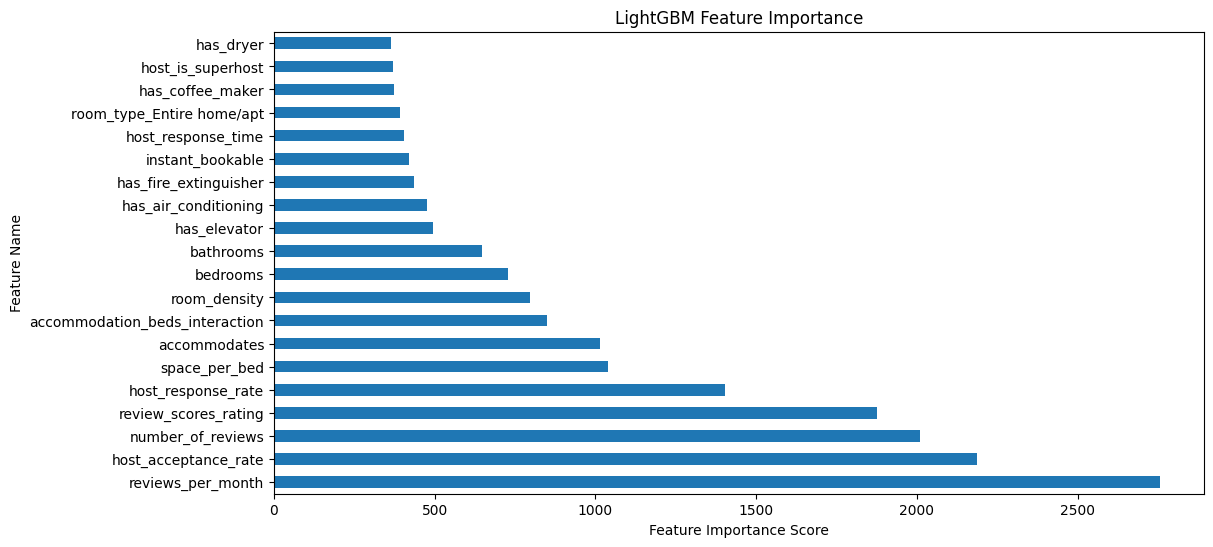

In [121]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor


treeLGBM_X = df_cleaned.drop(columns='price')  # Features
treeLGBM_y = df_cleaned['price']  # Target Variable


treeXG_X['price_per_accommodate'] = treeXG_y / treeXG_X['accommodates']



treeLGBM_X_train, treeLGBM_X_test, treeLGBM_y_train, treeLGBM_y_test = train_test_split(
    treeLGBM_X, treeLGBM_y, test_size=0.2, random_state=42
)


lgbm_model = LGBMRegressor(
    n_estimators=700,  # Increase trees
    learning_rate=0.02,  # Lower learning rate
    max_depth=9,  # Allow deeper splits
    num_leaves=40,  # Increase complexity slightly
    feature_fraction=0.8,  # Use 80% of features per iteration
    random_state=42
)



lgbm_model.fit(treeLGBM_X_train, treeLGBM_y_train)


treeLGBM_y_pred = lgbm_model.predict(treeLGBM_X_test)
print("Predicted Prices (LightGBM):", treeLGBM_y_pred)


mae_lgbm = mean_absolute_error(treeLGBM_y_test, treeLGBM_y_pred)
mse_lgbm = mean_squared_error(treeLGBM_y_test, treeLGBM_y_pred)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(treeLGBM_y_test, treeLGBM_y_pred)

print(f"\n🔍 Model Performance (LightGBM):")
print(f"Mean Absolute Error (MAE): {mae_lgbm:.2f}")
print(f"Mean Squared Error (MSE): {mse_lgbm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm:.2f}")
print(f"R² Score: {r2_lgbm:.4f}")


plt.figure(figsize=(12, 6))
importance = pd.Series(lgbm_model.feature_importances_, index=treeLGBM_X.columns)
importance.nlargest(20).plot(kind='barh')
plt.title("LightGBM Feature Importance")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.show()


### LightGBM with XGBoost

In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge  # Meta-model

# ✅ Prepare Data
T = df_cleaned.drop(columns='price')
U = df_cleaned['price']

# Remove low-importance features
low_importance_features = ['has_stove', 'has_heating', 'has_game_console', 'has_bbq_grill']
T = T.drop(columns=low_importance_features)

# Split into training and testing sets
t_train, t_test, u_train, u_test = train_test_split(T, U, test_size=0.2, random_state=42)

# ✅ Define Base Models
xgb_model = XGBRegressor(
    n_estimators=3000, learning_rate=0.02, max_depth=10, subsample=0.9,
    colsample_bytree=0.9, gamma=0.2, reg_lambda=3, reg_alpha=2, min_child_weight=3,
    random_state=42
)

lgbm_model = LGBMRegressor(
    n_estimators=3000, learning_rate=0.02, max_depth=10, subsample=0.9,
    colsample_bytree=0.9, reg_lambda=3, reg_alpha=2, random_state=42
)

# ✅ Define Meta-Model (Final Layer)
meta_model = Ridge(alpha=1.0)  # You can try other models like RandomForestRegressor

# ✅ Create Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model)],
    final_estimator=meta_model
)

# Train the Stacking Model (XGBoost + LightGBM)
stacking_model.fit(t_train, u_train)

# Make Predictions
u_pred = stacking_model.predict(t_test)

# Evaluate Performance
mae = mean_absolute_error(u_test, u_pred)
mse = mean_squared_error(u_test, u_pred)
rmse = np.sqrt(mse)
r2 = r2_score(u_test, u_pred)

print(f"Stacking - Mean Absolute Error (MAE): {mae}")
print(f"Stacking - Mean Squared Error (MSE): {mse}")
print(f"Stacking - Root Mean Squared Error (RMSE): {rmse}")
print(f"Stacking - R² Score: {r2:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 30297, number of used features: 67
[LightGBM] [Info] Start training from score 131.138132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

# 4. Analysis and Findings
